In [2]:
from manim import *

Manim Community v0.16.0

In [4]:
config.media_width = "100%"
config.media_embed = True

In [3]:
%%manim -qm -v WARNING CodeScene

CODE_STR = """\
class Example(Scene):
    def construct(self):
        t = Circle(radius=3,color=RED)
        t.shift(UP)

        self.play(
            DrawBorderThenFill(t, run_time=3, rate_func=there_and_back)
        )
        self.wait()"""


class CodeScene(Scene):
    remark_line_props = {
        "fill_opacity": 0.2,
        "stroke_opacity": 0,
        "stroke_width": 0,
        "color": YELLOW
    }
    def construct(self):
        code_kwargs = {"code": CODE_STR, "font": "Monospace", "language": "python", "style": "monokai"}
        code = Code(**code_kwargs,background="window",tab_width=4)
        code.width = config.frame_width-1

        self.add(code)
        rmk = self.create_remark_rectangle(code,1)
        self.play(FadeIn(rmk))
        self.wait()
        self.transform_remark_rectangle(rmk,code,3,2)
        self.wait()
        self.transform_remark_rectangle(rmk,code,6,3)
        self.wait()

    def create_remark_rectangle(self,
                                code, start,
                                nl=1, buff=0.1,
                                left_buff=0.1,
                                end=None,
                                rect_kwargs=None,
                                include_numbers=True,
                                code_index=2):
        if rect_kwargs != None:
            tmp_kw = self.remark_line_props.copy()
            for k in rect_kwargs:
                tmp_kw[k] = rect_kwargs[k]
            rect_kwargs = tmp_kw
        else:
            rect_kwargs = self.remark_line_props.copy()
        back = code[0]
        letters = code[code_index]
        if include_numbers:
            left_coords = code[1].get_left()
        else:
            left_coords = letters.get_left()
        start -= 1
        end_index = start + nl if end == None else end + 1
        letters_grp = letters[start:end_index]
        rect = Rectangle(
            width=abs(back.get_right()-left_coords)[0]+left_buff,
            height=code[1][start:end_index].height+buff,
            **rect_kwargs,
        )
        rect.move_to(letters_grp.get_center())\
            .align_to(left_coords,LEFT)\
            .align_to(code[1][start:end_index],UP)\
            .shift(left_buff*LEFT+UP*buff/2)
        return rect

    def transform_remark_rectangle(self,
                                   rmk,
                                   code,
                                   start,nl=1,
                                   rect_kwargs=None,
                                   added_anims=[],
                                   anim_kwargs={"run_time":1.3},
                                   **kwargs
                                  ):
        new_rect = self.create_remark_rectangle(code,start,nl,**kwargs)
        new_rect.match_style(rmk)
        if rect_kwargs != None:
            new_rect.set_style(**rect_kwargs)
        self.play(
            Transform(rmk,new_rect),
            *added_anims,
            **anim_kwargs,
        )

In [4]:
%%manim -qm -v WARNING NLine

class NLine(Scene):
    def construct(self):
        up_nl = NumberLine(
            x_range=[-10,10,1],
            length=13,include_numbers=True,label_direction=UP,
        )
        down_nl = NumberLine(
            x_range=[-100,100,20],
            length=13,include_numbers=True,label_direction=DOWN,
        )
        gp = VGroup(up_nl,down_nl).arrange(DOWN,buff=3)
        func = lambda x: x**2
        dx = 0.5
        colors = [RED,YELLOW]
        x_numbers = np.arange(-10,10+dx,dx)
        fx_numbers = [func(x) for x in x_numbers]
        up_dots = VGroup(*[Dot(up_nl.n2p(x)).scale(0.7) for x in x_numbers])
        down_dots = VGroup(*[Dot(down_nl.n2p(x)).scale(0.7) for x in fx_numbers])
        lines = VGroup(*[
            Line(ds.get_center(),de.get_center(),stroke_width=2)
            for ds,de in zip(up_dots,down_dots)
        ])
        for mob in [up_dots,down_dots,lines]:
            mob.set_color_by_gradient(*colors)
        x_label = MathTex("x").scale(2).next_to(up_nl,UP)
        fx_label = MathTex("f(x)=x^2").scale(2).next_to(down_nl,DOWN)

        # self.add(gp,up_dots,down_dots,lines)
        self.play(
            Write(up_nl),Write(x_label)
        )
        self.play(*list(map(GrowFromCenter,up_dots)))
        self.wait()
        self.play(
            Write(down_nl),Write(fx_label)
        )
        self.wait()
        self.play(
            *list(map(Create,lines)),
            ReplacementTransform(up_dots.copy(),down_dots),
            run_time=5
        )
        self.wait()

In [5]:
%%manim -qm -v WARNING FTable

class FTable(Scene):
    def construct(self):
        f = lambda x: x**2
        table = MathTable(
            [
                ["x","f(x)=x^2"],
                *[
                    [x,f(x)]
                    for x in range(8)
                ]
            ],
            include_outer_lines=True,
            h_buff=0.4,v_buff=0.4,line_config={"stroke_width":1}
        )
        table.scale(0.8)
        cols = table.get_columns()
        cols[0].set_color(RED) # x col
        cols[1].set_color(BLUE) # fx col

        x_vals  = cols[0][1:]
        fx_vals = cols[1][1:]
        # table[0].remove(*x_vals) # remove x_vals  from table
        table[0].remove(*fx_vals) # remove fx_vals from table

        self.play(Write(table))
        self.wait()
        self.play(
            LaggedStartMap(
                lambda x: ReplacementTransform(x[0].copy(),x[1]),
                zip(x_vals,fx_vals),
                run_time=6
            )
        )
        self.wait()

In [6]:
%%manim -qm -v WARNING TMatrix

class TMatrix(Scene):
    def construct(self):
        matrix = np.array([
            [1,4,3],
            [3,5,2],
            [5,2,3]
        ])

        matrix_mob = Matrix(matrix).scale(0.8).to_edge(UP)
        transpose_matrix_mob = Matrix(matrix.transpose()).scale(0.8).to_edge(DOWN)

        self.add(matrix_mob,transpose_matrix_mob[1:])

        for row,col in zip(matrix_mob.get_rows(),transpose_matrix_mob.get_columns()):
            r = row.copy()
            row.fade(0.5)
            self.play(r.animate.move_to(ORIGIN),run_time=2)
            self.wait()
            self.play(r.animate.arrange(DOWN,buff=0.3))
            self.wait()
            self.play(ReplacementTransform(r,col))
            self.wait()

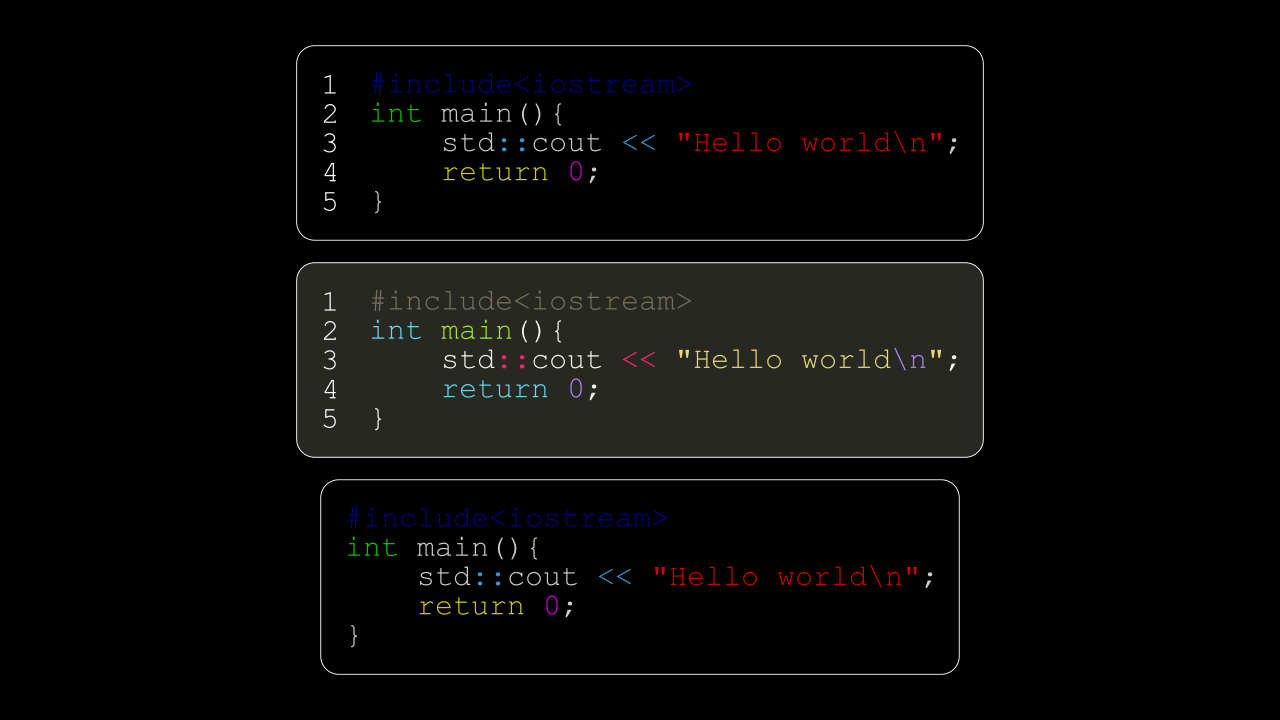

In [7]:
%%manim -qm -v WARNING Ex1

class Ex1(Scene):
    def construct(self):
        # Manim looks for the file using as reference the location of the terminal
        # Code does NOT use CONFIG dictionary or assets directory
        code = Code(file_name="./code_example.cpp",font="Monospace")
        # all styles: https://help.farbox.com/pygments.html
        code_monokai = Code(file_name="./code_example.cpp",font="Monospace",style="monokai")

        code_without_number_lines = Code(file_name="./code_example.cpp",font="Monospace",insert_line_no=False)

        grp = Group(code, code_monokai,code_without_number_lines).arrange(DOWN)
        self.add(grp)

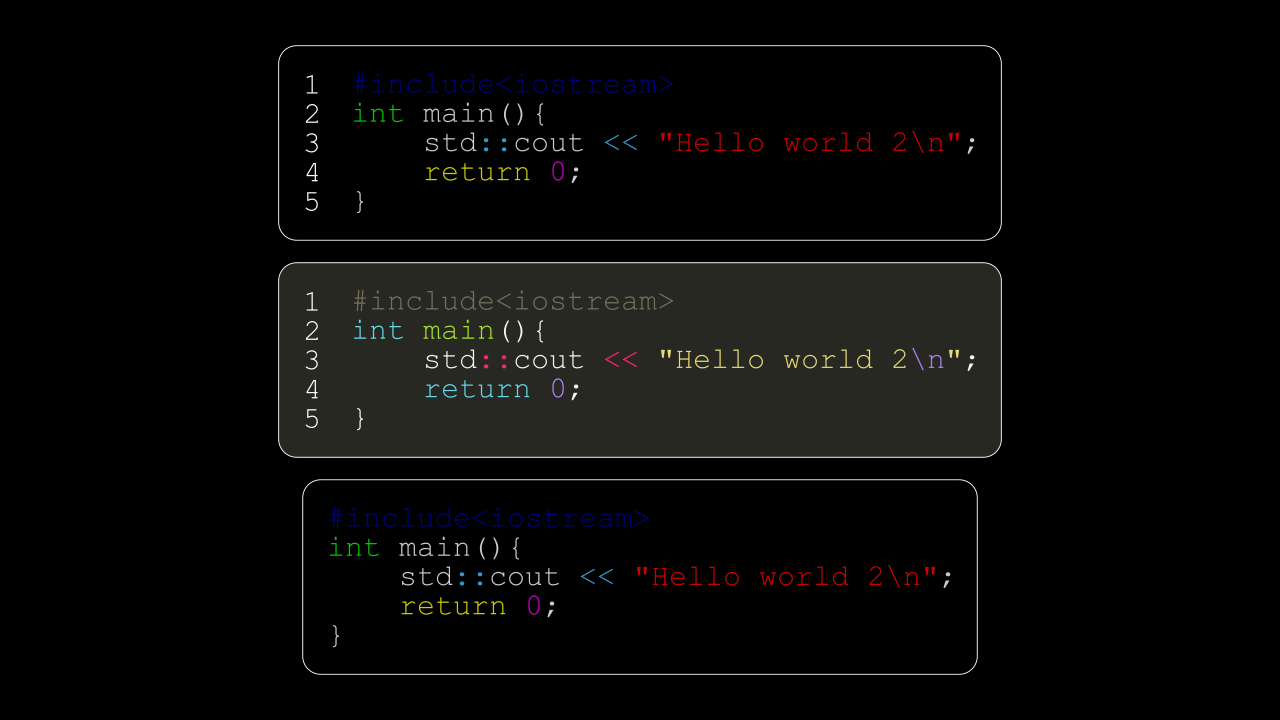

In [8]:
%%manim -qm -v WARNING Ex2

CODE_STR = """\
#include<iostream>
int main(){
    std::cout << "Hello world 2\\n";
    return 0;
}"""

class Ex2(Scene):
    def construct(self):
        code = Code(code=CODE_STR,font="Monospace",language="cpp")
        # all languages: https://pygments.org/languages/
        code_monokai = Code(code=CODE_STR,font="Monospace",style="monokai",language="cpp")

        code_without_number_lines = Code(code=CODE_STR,font="Monospace",insert_line_no=False,language="cpp")

        grp = Group(code, code_monokai,code_without_number_lines).arrange(DOWN)
        self.add(grp)

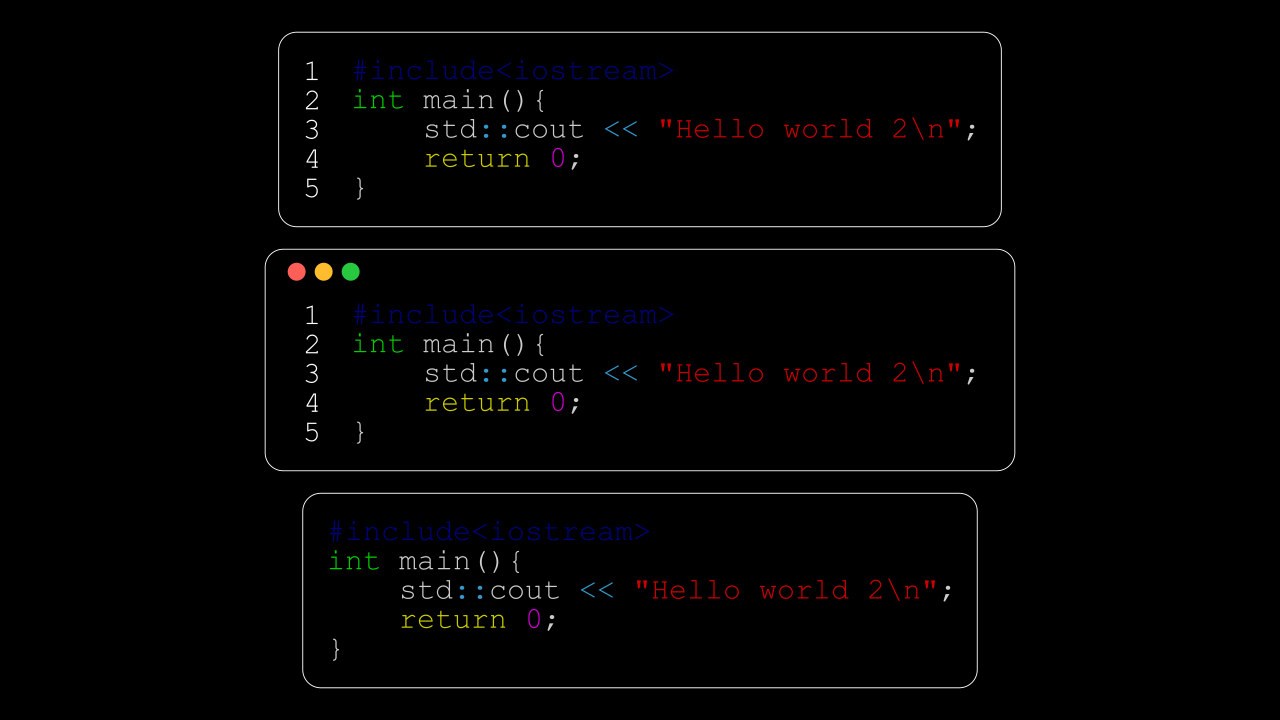

In [9]:
%%manim -qm -v WARNING Ex3

CODE_STR = """\
#include<iostream>
int main(){
    std::cout << "Hello world 2\\n";
    return 0;
}"""

class Ex3(Scene):
    def construct(self):
        code_kwargs = {"code": CODE_STR, "font": "Monospace", "language": "cpp"}
        code = Code(**code_kwargs)
        code_window = Code(**code_kwargs,background="window")
        code_without_number_lines = Code(**code_kwargs,insert_line_no=False)

        grp = Group(code,code_window,code_without_number_lines).arrange(DOWN)
        self.add(grp)

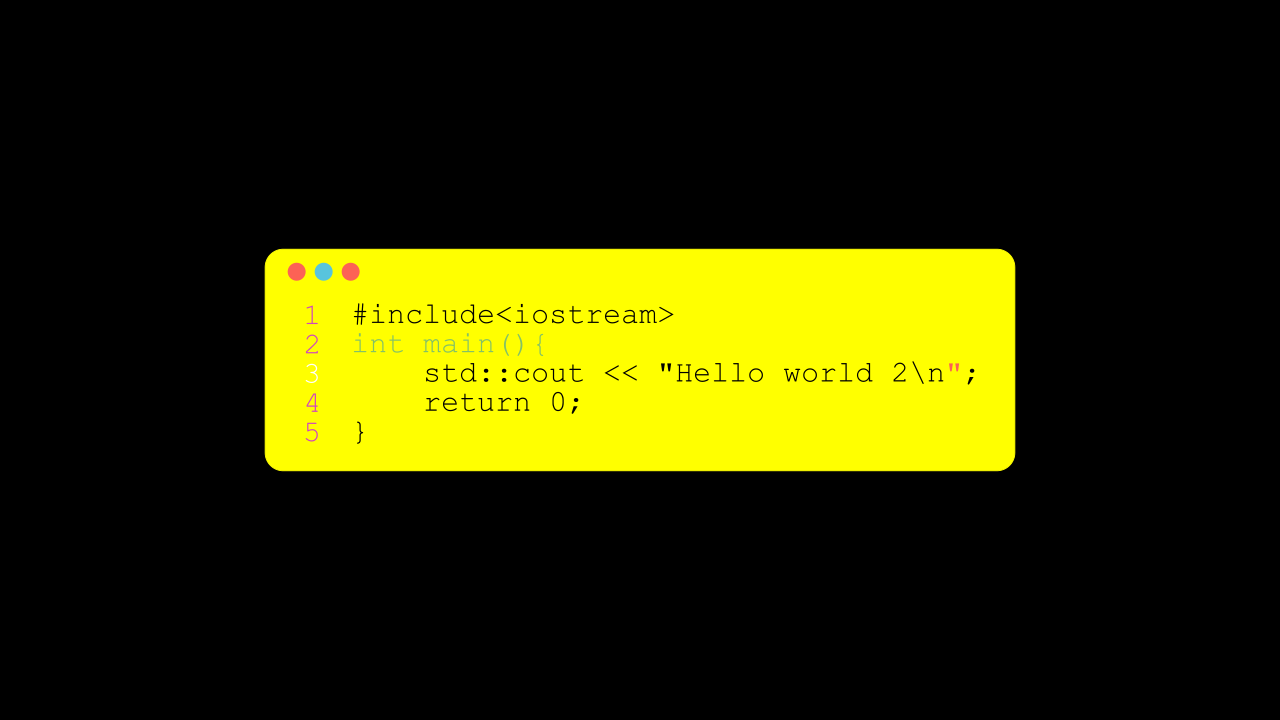

In [10]:
%%manim -qm -v WARNING Ex4

CODE_STR = """\
#include<iostream>
int main(){
    std::cout << "Hello world 2\\n";
    return 0;
}"""

class Ex4(Scene):
    def construct(self):
        code_kwargs = {"code": CODE_STR, "font": "Monospace", "language": "cpp"}
        code = Code(**code_kwargs,background="window")

        code[0].set_color(YELLOW)     # background
        code[0][1].set_color(RED)     # buttons
        code[0][1][1].set_color(BLUE) # second button

        code[1].set_color(PINK)     # numbers
        code[1][2].set_color(WHITE) # 3th number

        code[2].set_color(BLACK)      # code
        code[2][1].set_color(GREEN)   # code line 2
        code[2][2][-2].set_color(RED) # code line 3, last symbol

        self.add(code)

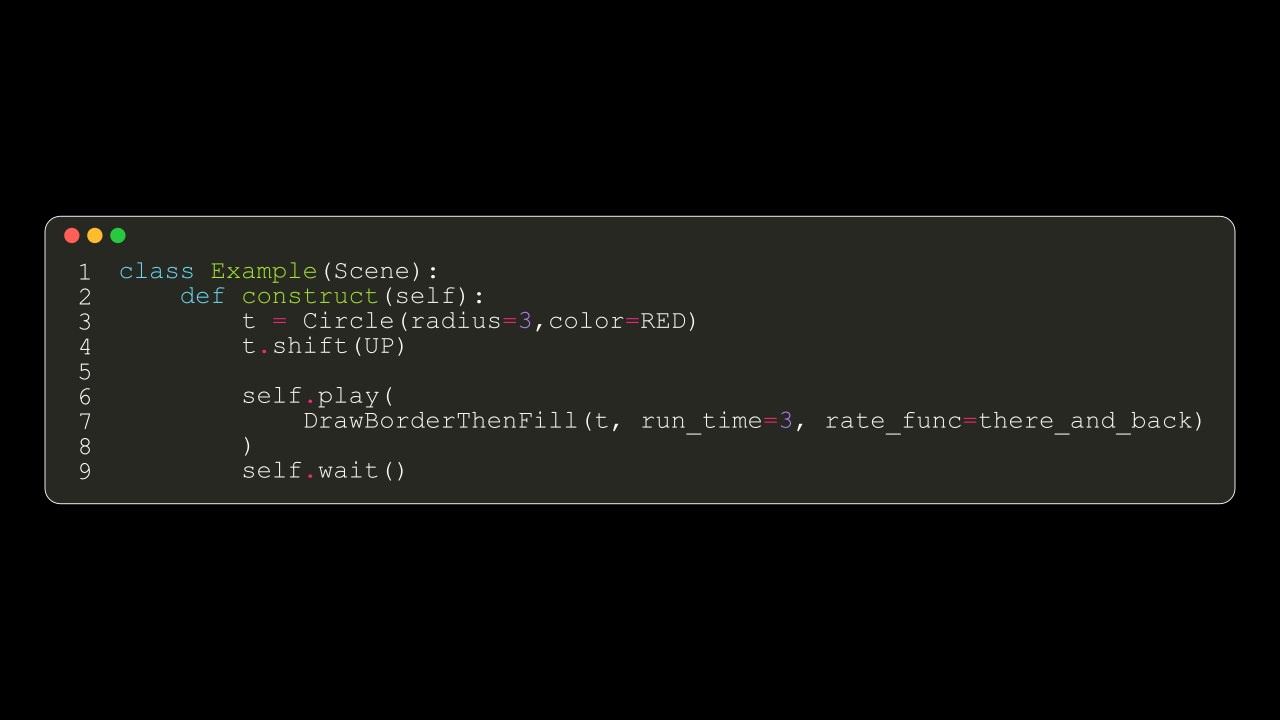

In [11]:
%%manim -qm -v WARNING Ex5

CODE_STR = """\
class Example(Scene):
    def construct(self):
        t = Circle(radius=3,color=RED)
        t.shift(UP)

        self.play(
            DrawBorderThenFill(t, run_time=3, rate_func=there_and_back)
        )
        self.wait()"""

class Ex5(Scene):
    def construct(self):
        code_kwargs = {"code": CODE_STR, "font": "Monospace", "language": "python", "style": "monokai"}
        code = Code(**code_kwargs,background="window",tab_width=4)

        code.width = config.frame_width-1

        self.add(code)

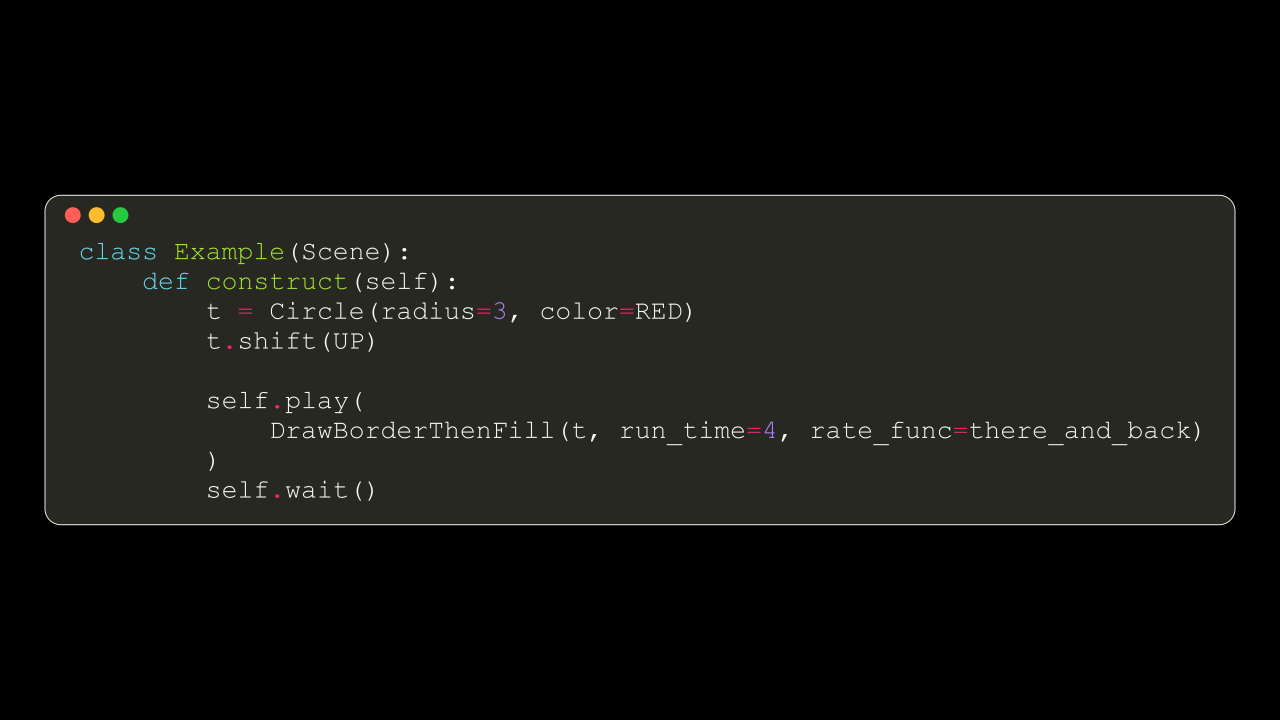

In [8]:
%%manim -qm -v WARNING Ex6

CODE_STR = """\
class Example(Scene):
    def construct(self):
        t = Circle(radius=3, color=RED)
        t.shift(UP)

        self.play(
            DrawBorderThenFill(t, run_time=4, rate_func=there_and_back)
        )
        self.wait()"""


class Ex6(Scene):
    def construct(self):
        from imports import ManimCode
        code = ManimCode(code=CODE_STR)
        code.width = config.frame_width-1

        self.add(code)

In [10]:
class MyScene(Scene):
    def setup(self):
        self.np = NumberPlane(axis_config={"include_numbers":True})
        self.add(self.np)

line1_vector = [5. 1. 0.]
line1_unit_vector = [0.98058068 0.19611614 0.        ]
line2_vector = [ 4. -2.  0.]


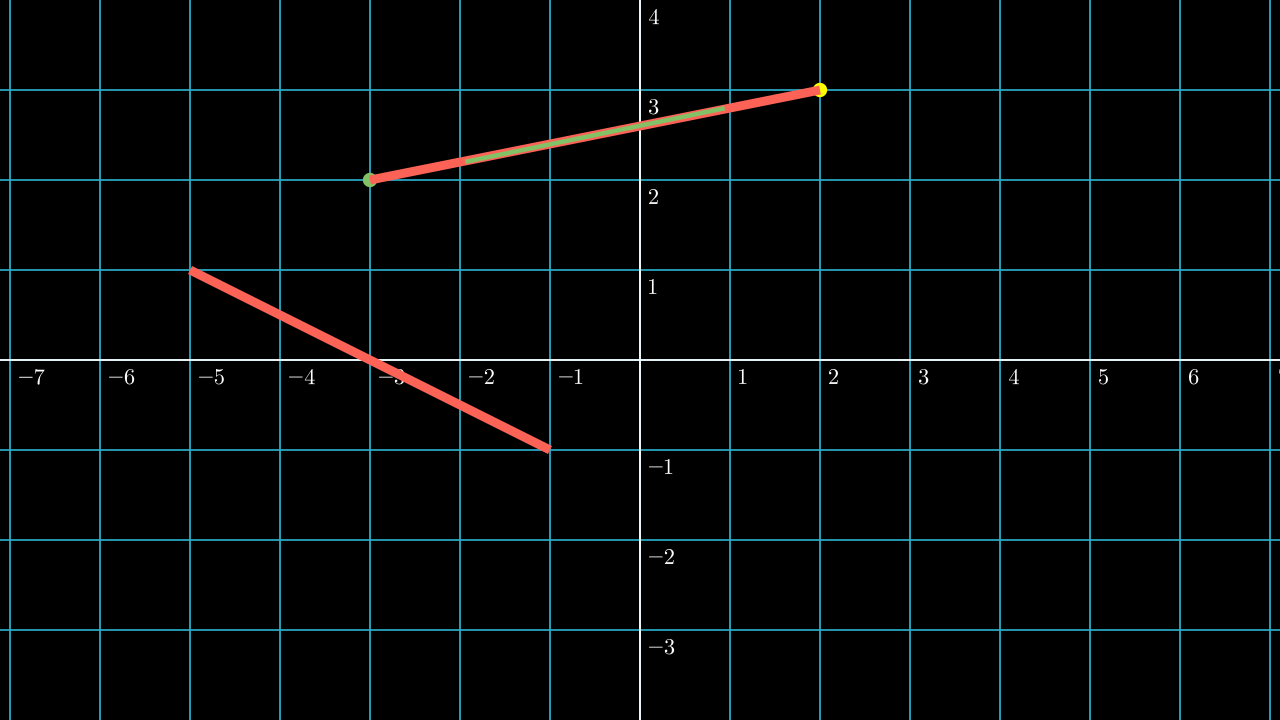

In [11]:
%%manim -qm -v WARNING Ex7

class Ex7(MyScene):
    def construct(self):
        start = Dot([-3,2,0],color=GREEN)
        end   = Dot([ 2,3,0],color=YELLOW)
        line1 = Line(start.get_center(),end.get_center(),color=RED,stroke_width=10)
        line1_with_buffer = Line(start,end,color=GREEN,stroke_width=5,buff=1)

        line2 = line1.copy()
                                # new start, new end
        line2.put_start_and_end_on([-5,1,0], [-1,-1,0])

        print(f"line1_vector = {line1.get_vector()}")
        print(f"line1_unit_vector = {line1.get_unit_vector()}")
        print(f"line2_vector = {line2.get_vector()}")
        self.add(start,end,line1,line1_with_buffer,line2)

line1_angle = 11.309932474020213°
line1_angle = 153.43494882292202°


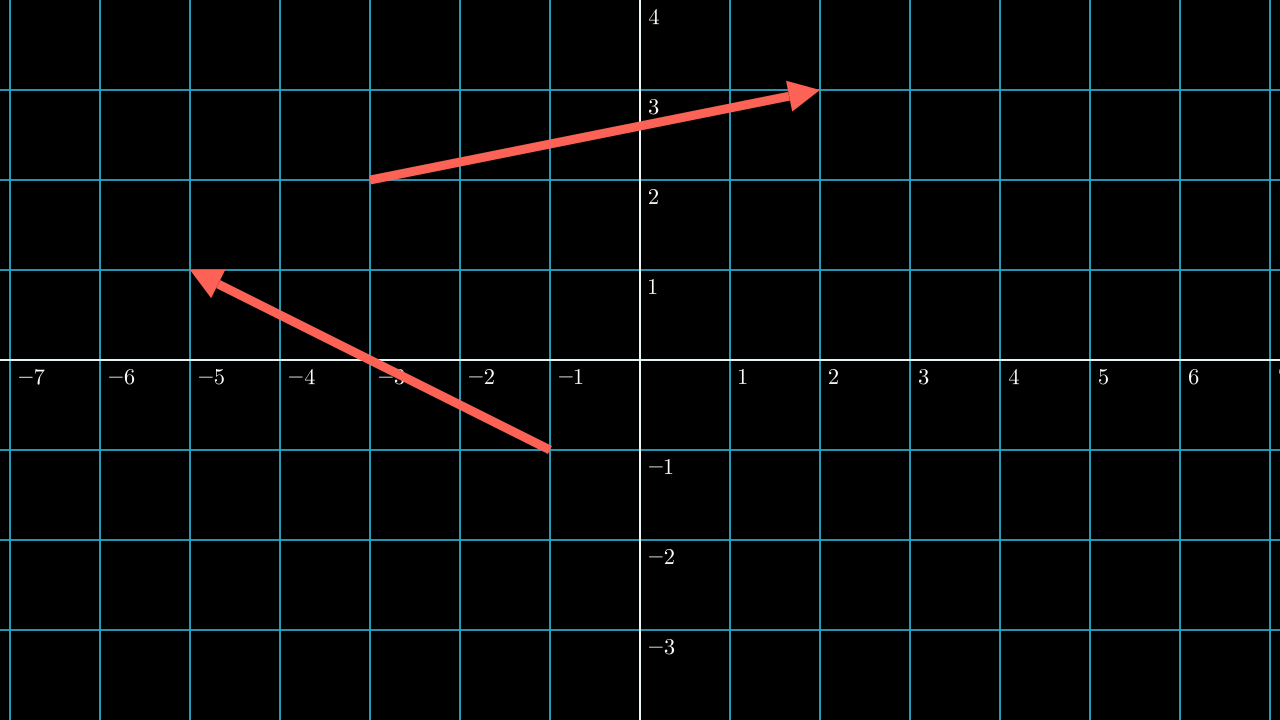

In [12]:
%%manim -qm -v WARNING Ex8

class Ex8(MyScene):
    def construct(self):
        start = [-3,2,0]
        end   = [ 2,3,0]
        line1 = Line(start,end,color=RED,stroke_width=10)

        line2 = line1.copy()
        line2.put_start_and_end_on([-1,-1,0],[-5,1,0])

        line1.add_tip()
        line2.add_tip()

        print(f"line1_angle = {line1.get_angle()*180/PI}°")
        print(f"line1_angle = {line2.get_angle()*180/PI}°")
        self.add(line1,line2)

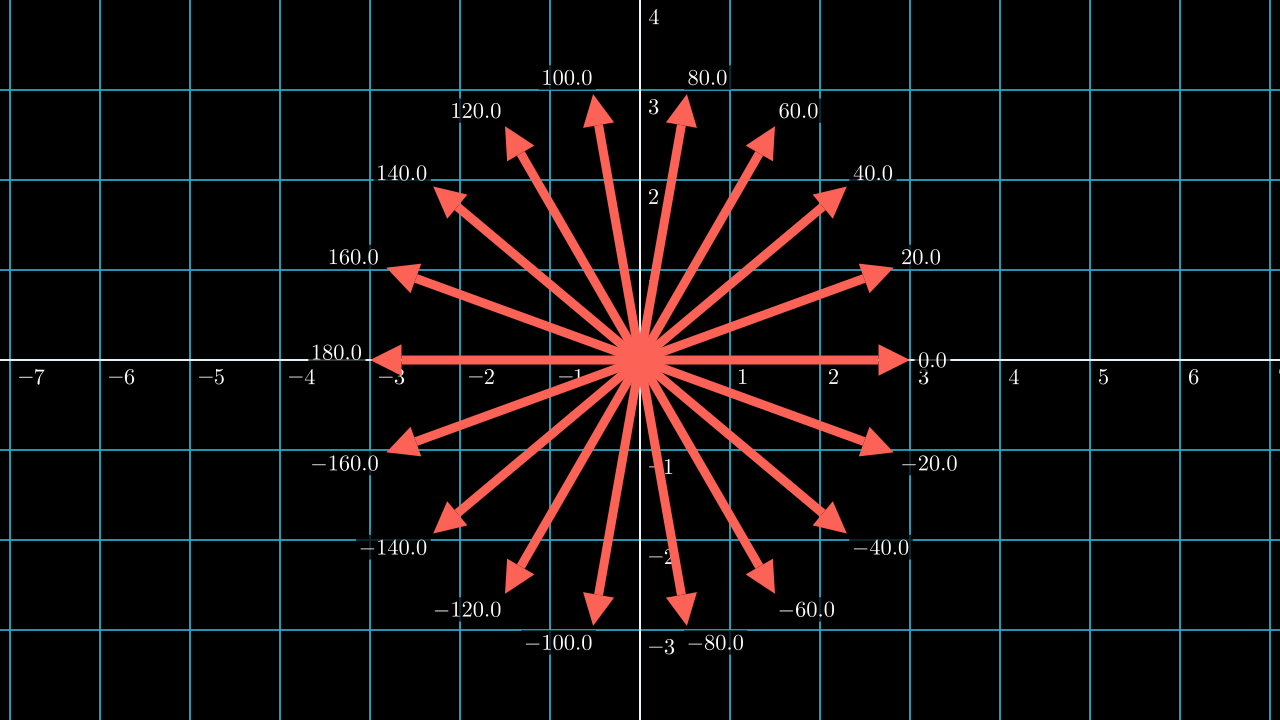

In [13]:
%%manim -qm -v WARNING Ex9

class Ex9(MyScene):
    def construct(self):
        line = Line(ORIGIN,RIGHT*3,stroke_width=10,color=RED)

        red_lines = VGroup(*[
            line.copy()
                .rotate(20*DEGREES*i,about_point=ORIGIN)
                .add_tip()
            for i in range(int(360/20))
        ])
        red_angles = VGroup(*[
            MathTex("%.1f°"%(l.get_angle()*180/PI))
                .scale(0.5)
                .next_to(l.get_end(),l.get_unit_vector(),buff=0.1)
                .add_background_rectangle(buff=0.05)
            for l in red_lines
        ])

        self.add(red_lines,red_angles)

25.0 + 16.0 = 41.0


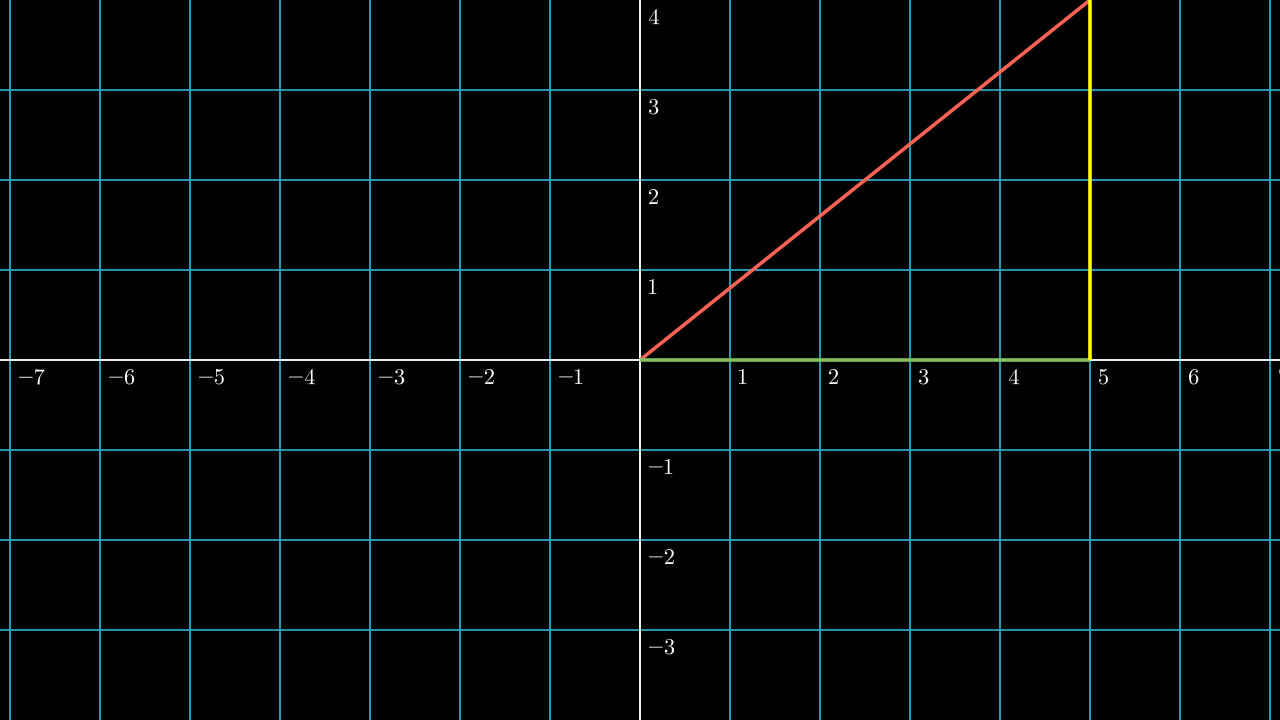

In [14]:
%%manim -qm -v WARNING Ex10

class Ex10(MyScene):
    def construct(self):
        hyp    = Line(ORIGIN  ,UP*4+RIGHT*5,color=RED)
        x_line = Line(ORIGIN  ,RIGHT*5     ,color=GREEN)
        y_line = Line(RIGHT*5 ,RIGHT*5+UP*4,color=YELLOW)

        print(f"{x_line.get_length()**2} + {y_line.get_length()**2} = {hyp.get_length()**2}")

        self.add(hyp,x_line,y_line)

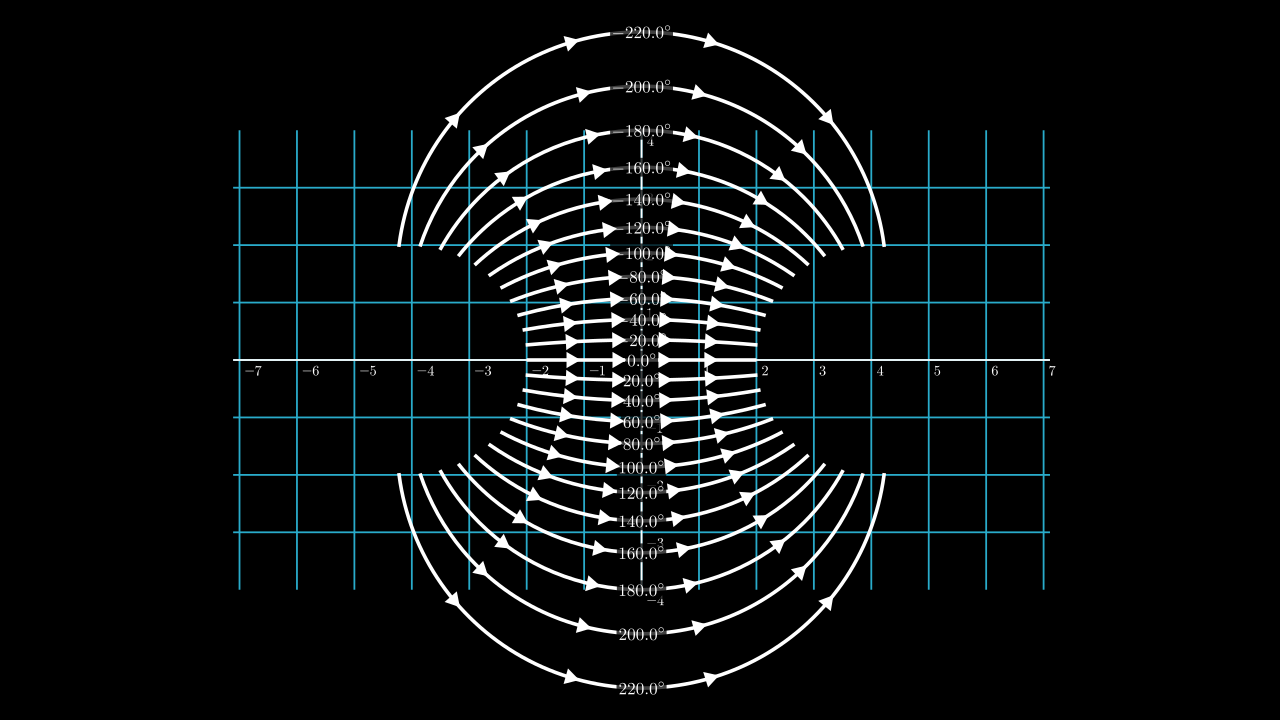

In [15]:
%%manim -qm -v WARNING Ex11

class Ex11(MyScene):
    def construct(self):
        path_arcs = range(-220,220+20,20)
        # Lines
        lines_paths = VGroup(*[
            Line(LEFT*4,RIGHT*4,path_arc=path_arc*DEGREES,buff=2)
            for path_arc in path_arcs
        ])
        # Angles (text) with backgrounds
        path_arcs_tex = VGroup(*[
            MathTex("%.1f^\\circ"%path_arc)
                .scale(0.6)
                .add_background_rectangle(buff=0.05)
                .move_to(lines_paths[i].point_from_proportion(0.5))
            for i,path_arc in enumerate(path_arcs)
        ])
        # Tips
        tips = VGroup(*[
            VGroup(*[
                Triangle(fill_opacity=1,color=WHITE)
                    .scale(0.1)
                    .move_to(line.point_from_proportion(prop))
                    .rotate(
                        -90*DEGREES+Line(
                            line.point_from_proportion(prop),
                            line.point_from_proportion(prop+0.01),
                        ).get_angle()
                    )
                for prop in np.arange(0.2,1,0.2)
            ])
            for line in lines_paths
        ])


        self.add(lines_paths,path_arcs_tex,tips)
        Group(*self.mobjects).height = config.frame_height-0.5

angle = 53.13010235415598


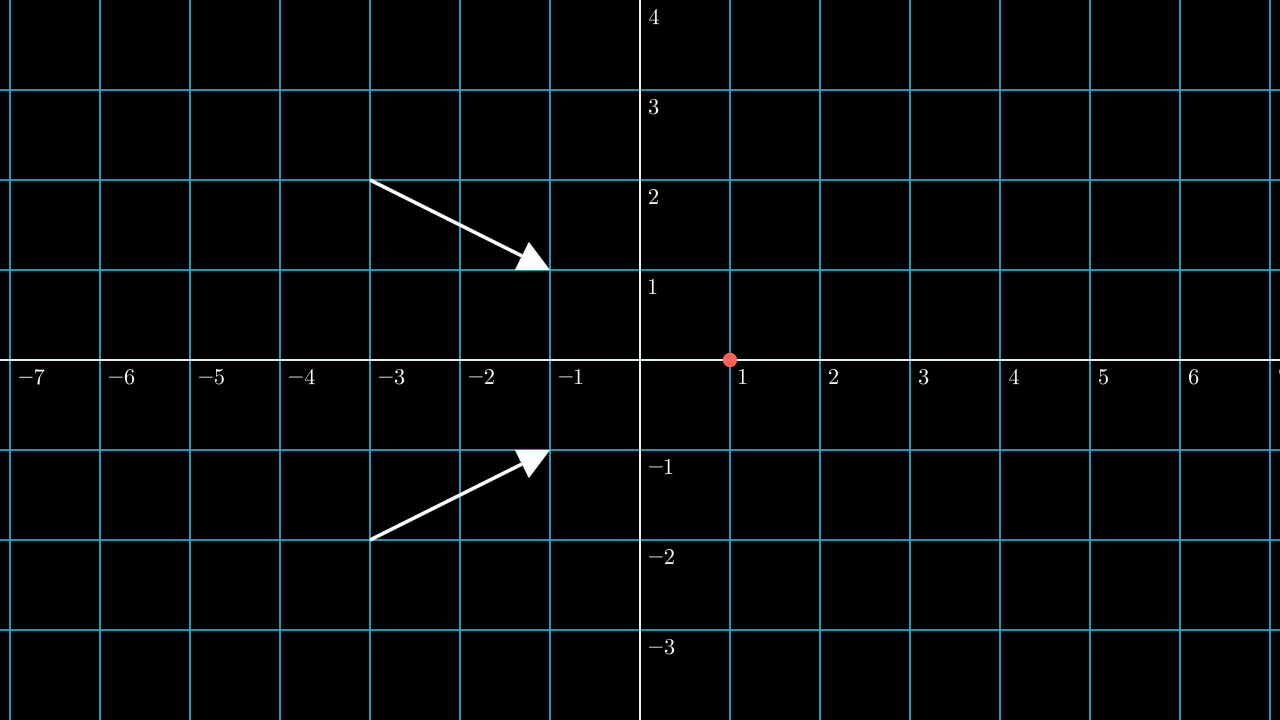

In [16]:
%%manim -qm -v WARNING Ex12

def get_intersection_between_lines(l1: Line,l2: Line):
    return line_intersection(
        (l1.get_start_and_end()),(l2.get_start_and_end())
    )

class Ex12(MyScene):
    def construct(self):
        l1 = Line([-3,2,0],[-1,1,0]).add_tip()
        l2 = Line([-3,-2,0],[-1,-1,0]).add_tip()
        intersection = get_intersection_between_lines(l1,l2)
        angle = angle_between_vectors(l1.get_vector(),l2.get_vector())
        print(f"angle = {angle*180/PI}")
        dot = Dot(intersection,color=RED)

        self.add(l1,l2,dot)

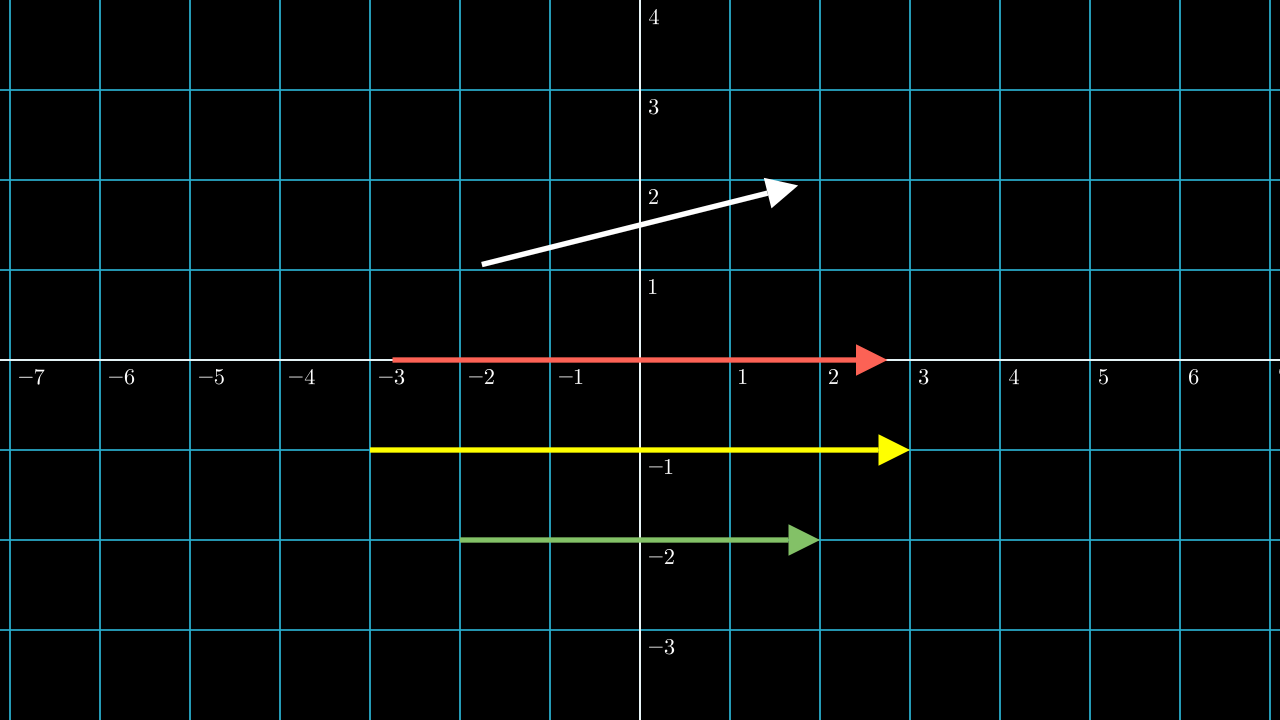

In [17]:
%%manim -qm -v WARNING Ex13

class Ex13(MyScene):
    def construct(self):
        a1 = Arrow(LEFT*3,RIGHT*3,        color=RED)
        a2 = Arrow(LEFT*3,RIGHT*3,buff=0,color=YELLOW)
        a3 = Arrow(LEFT*3,RIGHT*3,buff=1,color=GREEN)
        a4 = Arrow(LEFT*2,UR+RIGHT)
        a2.shift(DOWN)
        a3.shift(DOWN*2)
        a4.shift(UP)

        self.add(a1,a2,a3,a4)

In [18]:
%%manim -qm -v WARNING Ex14

class Ex14(Scene):
    def construct(self):
        # As max_tip_length_to_length_ratio increases,
        # the length of the tip increases.
        arrows_tips_sizes = VGroup(*[
            Arrow(LEFT,RIGHT,max_tip_length_to_length_ratio=i)
            for i in np.arange(0,0.3,0.025)
        ]).arrange(DOWN,aligned_edge=LEFT)

        tips = [ArrowSquareTip,ArrowSquareFilledTip,ArrowCircleTip,ArrowCircleFilledTip]
        arrows_tips = VGroup(
            *[
                Arrow(LEFT*3,RIGHT*3,tip_shape=tip)
                for tip in tips
            ],
            *[
                DoubleArrow(LEFT*3,RIGHT*3,tip_shape_start=tip, tip_shape=tip)
                for tip in tips
            ],
        ).arrange(DOWN,aligned_edge=LEFT)

        Group(arrows_tips_sizes,arrows_tips).arrange(RIGHT,buff=1)

        # self.add(arrows)
        self.wait(0.5)
        self.play(*[GrowArrow(a) for a in arrows_tips_sizes],run_time=4)
        self.wait(0.5)
        self.play(*[GrowArrow(a) for a in arrows_tips],run_time=4)
        self.wait(0.5)

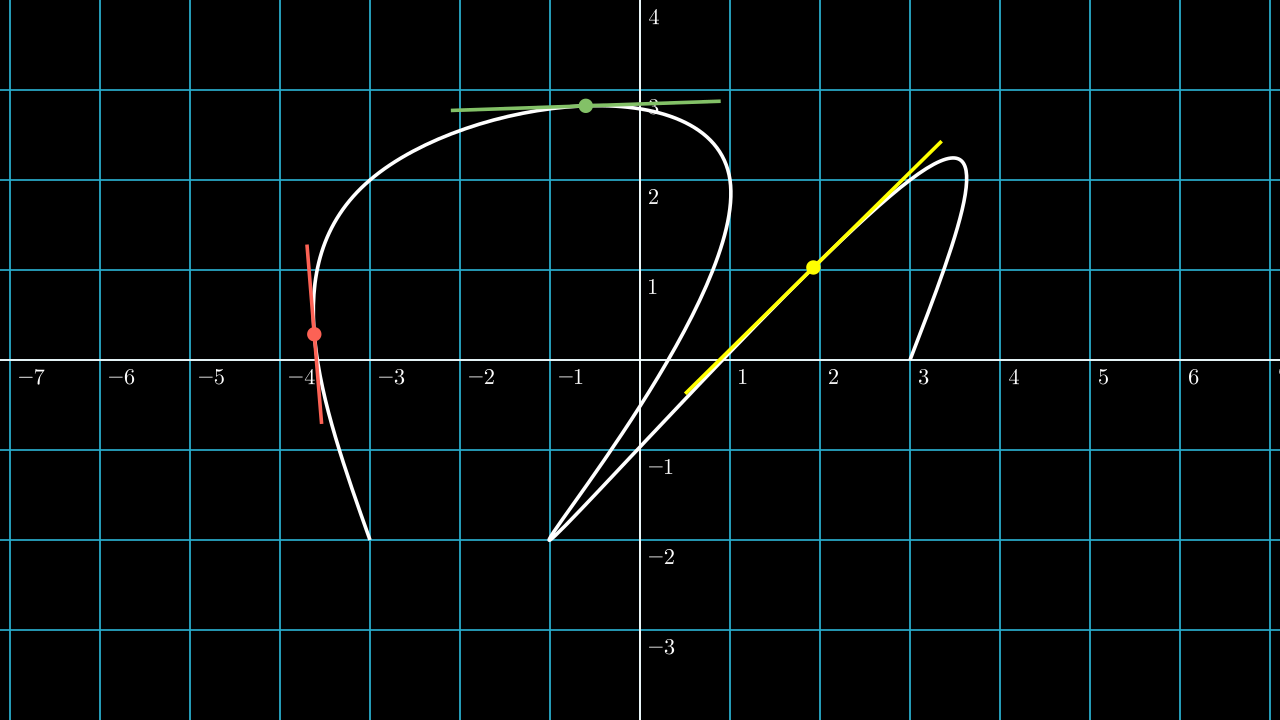

In [19]:
%%manim -qm -v WARNING Ex15

class Ex15(MyScene):
    def construct(self):
        path = VMobject().set_points_smoothly([
            ORIGIN,
            UP*2,
            UP*2+RIGHT*2,
            UP*2+RIGHT*2+DOWN*2+LEFT,
            UP*2+RIGHT*2+DOWN*2+LEFT+UR*2,
            UP*2+RIGHT*2+DOWN*2+LEFT+UR*2+DOWN
        ])
        path.move_to(ORIGIN)
        path.scale(2)

        g1 = VGroup(
            TangentLine(path,0.1,length=2,color=RED),
            Dot(path.point_from_proportion(0.1),color=RED),
        )
        g2 = VGroup(
            TangentLine(path,0.3,length=3,color=GREEN),
            Dot(path.point_from_proportion(0.3),color=GREEN),
        )
        g3 = VGroup(
            TangentLine(path,0.8,length=4,color=YELLOW),
            Dot(path.point_from_proportion(0.8),color=YELLOW),
        )

        self.add(path,g1,g2,g3)

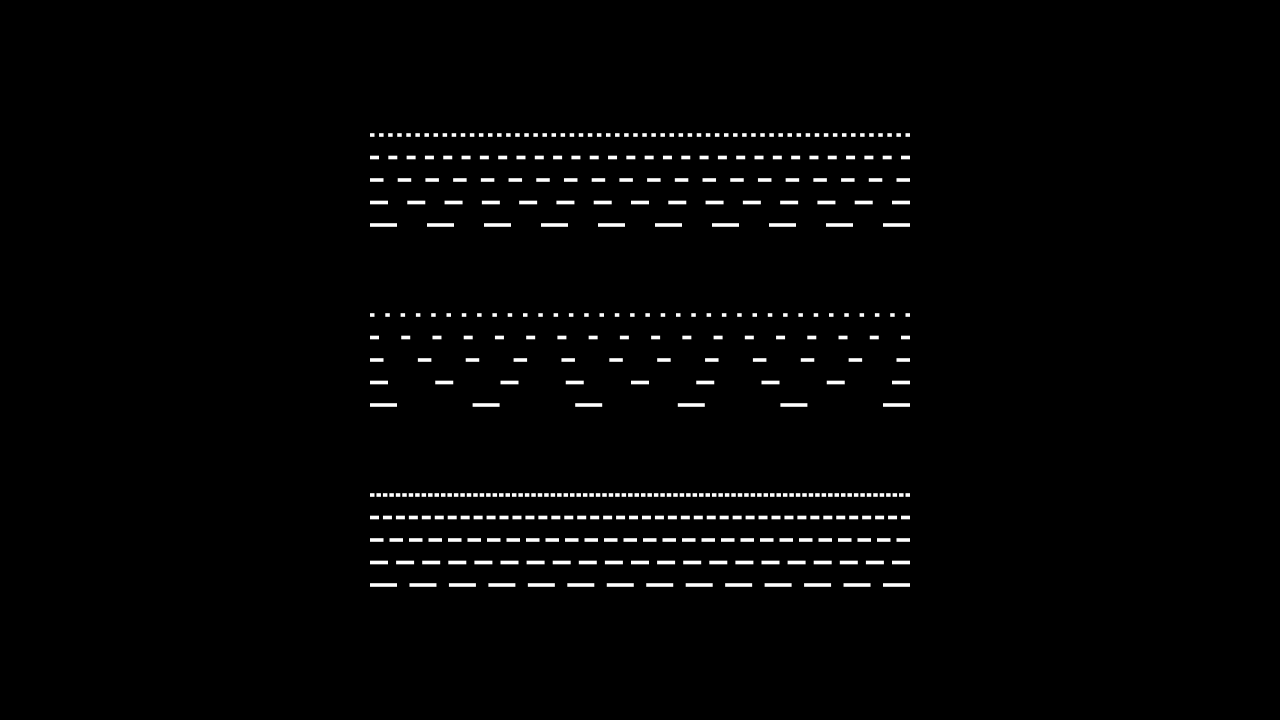

In [20]:
%%manim -qm -v WARNING Ex16

class Ex16(Scene):
    def construct(self):
        dl_grp_1 = VGroup(*[
            DashedLine(LEFT*3,RIGHT*3,dash_length=dl) #dashed_ratio = 0.5 by default
            for dl in [0.05,0.1,0.15,0.2,0.3]
        ]).arrange(DOWN,aligned_edge=LEFT)

        dl_grp_2 = VGroup(*[
            DashedLine(LEFT*3,RIGHT*3,dash_length=dl,dashed_ratio=0.3)
            for dl in [0.05,0.1,0.15,0.2,0.3]
        ]).arrange(DOWN,aligned_edge=LEFT)

        dl_grp_3 = VGroup(*[
            DashedLine(LEFT*3,RIGHT*3,dash_length=dl,dashed_ratio=0.7)
            for dl in [0.05,0.1,0.15,0.2,0.3]
        ]).arrange(DOWN,aligned_edge=LEFT)

        grp = Group(dl_grp_1,dl_grp_2,dl_grp_3).arrange(DOWN,buff=1)

        self.add(grp)

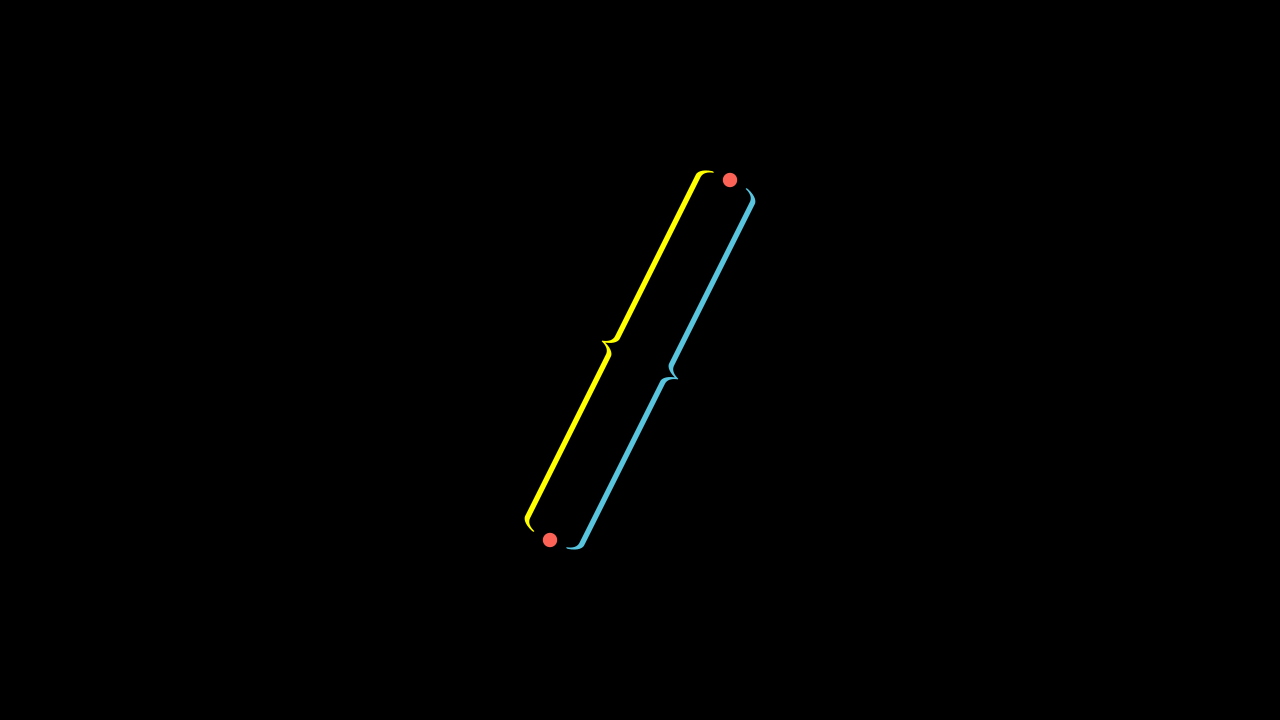

In [21]:
%%manim -qm -v WARNING Ex17

class Ex17(Scene):
    def construct(self):
        p1 = Dot([-1,-2,0],color=RED)
        p2 = Dot([1,2,0],color=RED)
        brace1 = BraceBetweenPoints(p1.get_center(),p2.get_center(),color=BLUE)
        brace2 = BraceBetweenPoints(p2.get_center(),p1.get_center(),color=YELLOW)
        self.add(p1,p2,brace1,brace2)

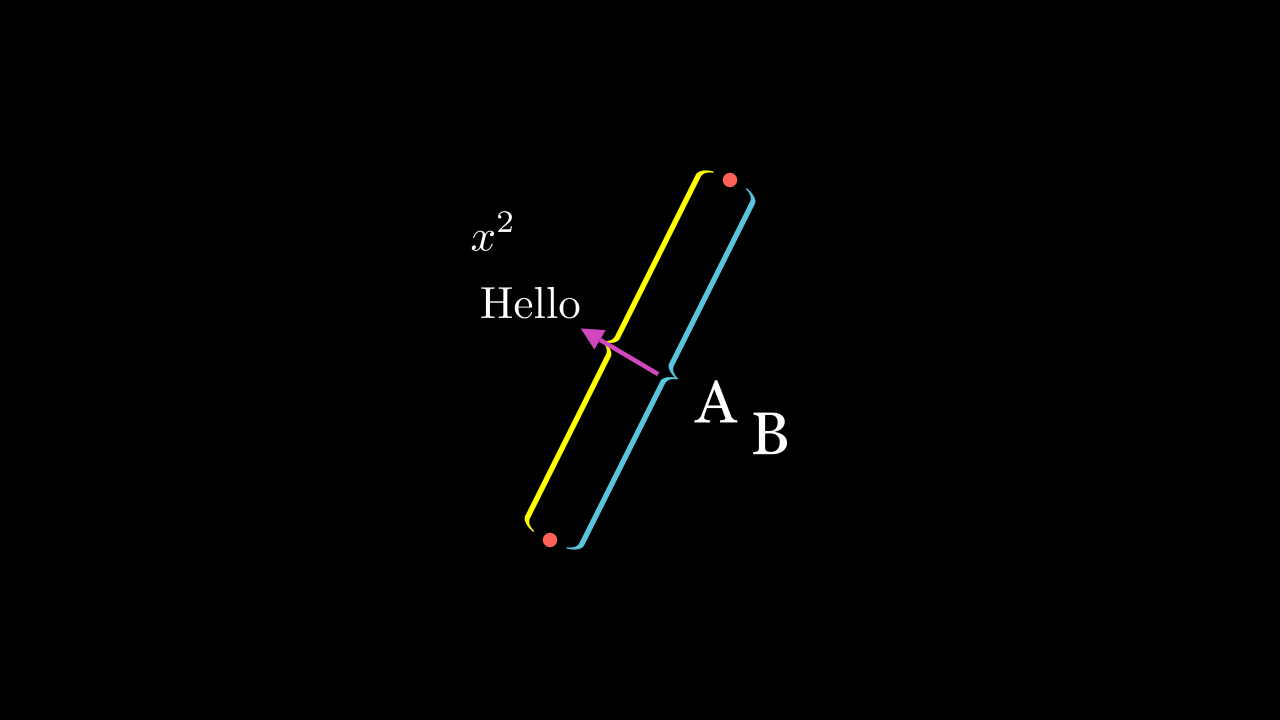

In [22]:
%%manim -qm -v WARNING Ex18

class Ex18(Scene):
    def construct(self):
        p1 = Dot([-1,-2,0],color=RED)
        p2 = Dot([1,2,0],color=RED)
        brace1 = BraceBetweenPoints(p1.get_center(),p2.get_center(),color=BLUE)
        brace2 = BraceBetweenPoints(p2.get_center(),p1.get_center(),color=YELLOW)
        self.add(p1,p2,brace1,brace2)

        _A = Text("A")
        _B = Text("B")

        brace1.put_at_tip(_A,use_next_to=False)
        brace1.put_at_tip(_B,use_next_to=False,buff=1)

        _C = brace2.get_text("Hello")
        _D = brace2.get_tex("x^2",buff=1)

        vector = Vector(brace2.get_direction(),color=PINK).move_to(brace2)
        # Vector([x,y,z]) === Arrow(ORIGIN,[x,y,z],buff=0)

        self.add(_A,_B,_C,_D,vector)

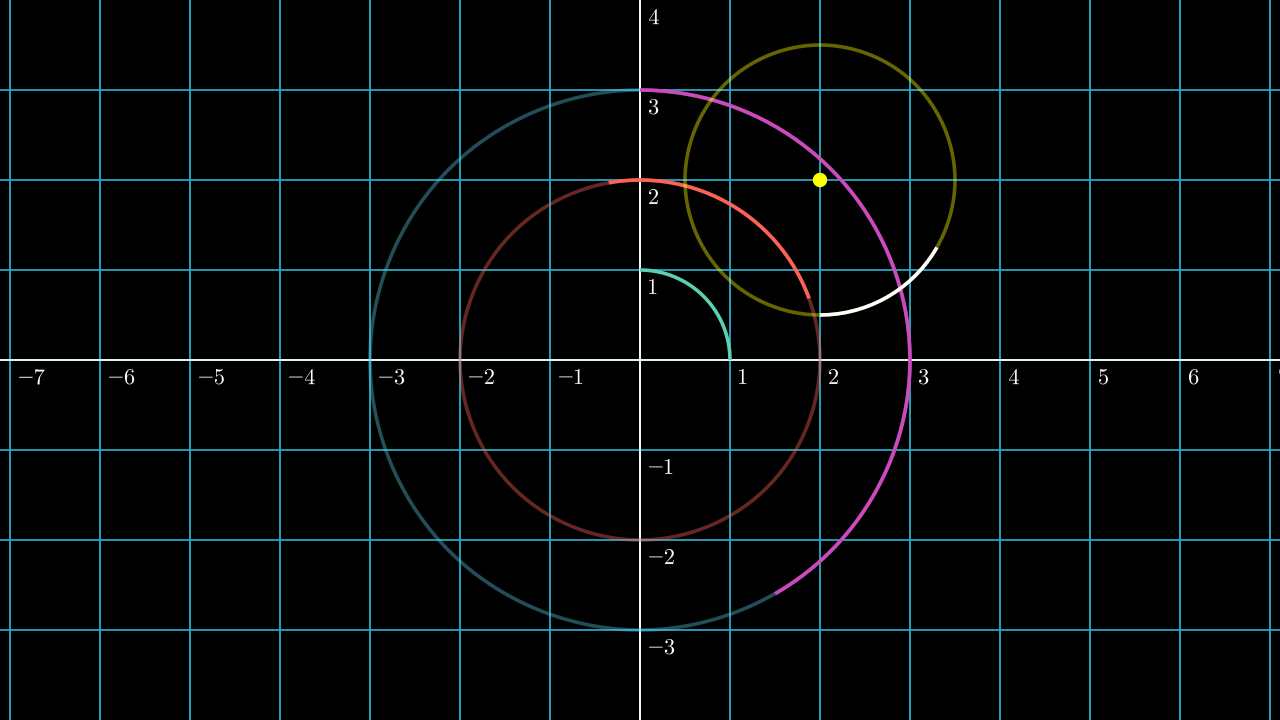

In [23]:
%%manim -qm -v WARNING Ex19

class Ex19(MyScene):
    def construct(self):
        arcs = VGroup(
            Arc(radius=1,color=TEAL),
            # ---------------------------
            Circle(radius=2,stroke_opacity=0.4),
            #     start_angle, increment angle
            Arc(2, 20*DEGREES, 80*DEGREES,color=RED),
            # ---------------------------
            Circle(radius=3,stroke_opacity=0.4,color=BLUE),
            Arc(3, 300*DEGREES, (60+90)*DEGREES,color=PINK),
            # ---------------------------
            Circle(radius=1.5,stroke_opacity=0.4,color=YELLOW,arc_center=[2,2,0]),
            Arc(1.5, -30*DEGREES, -60*DEGREES,arc_center=[2,2,0],color=WHITE),
        )
        Arc.move_arc_center_to

        dot = Dot(arcs[-1].get_arc_center(),color=YELLOW)

        self.add(arcs,dot)

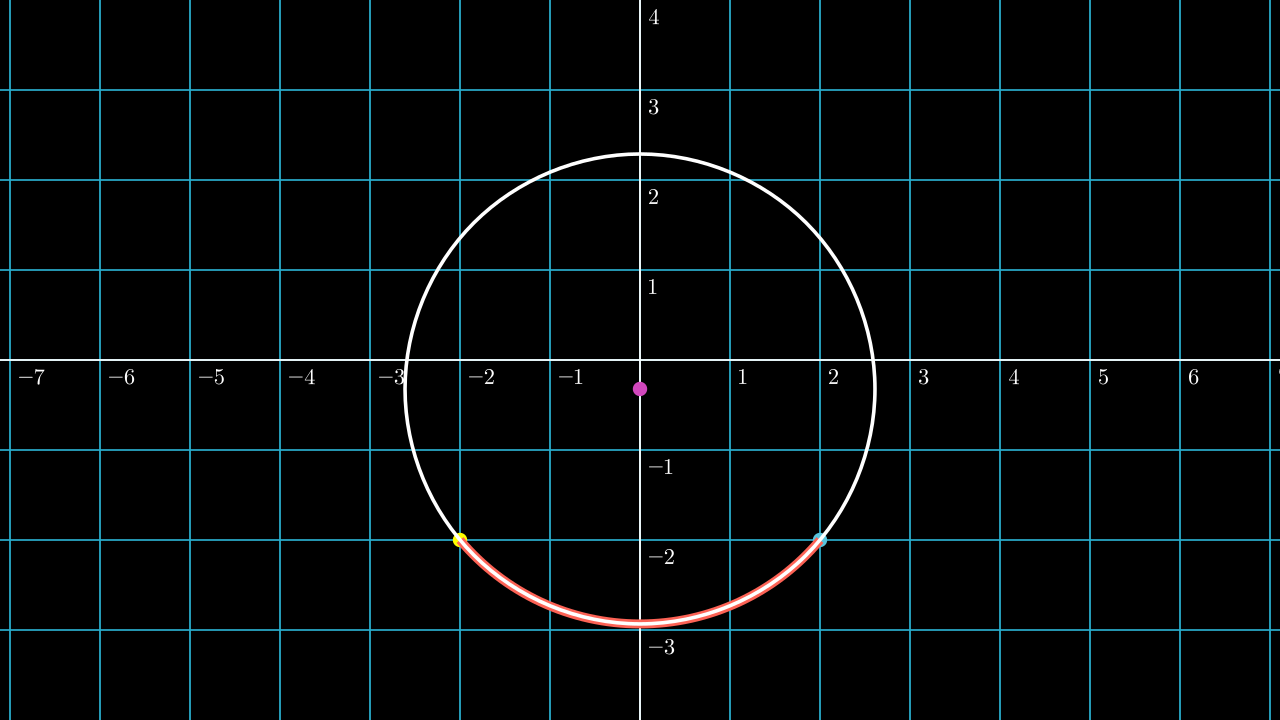

In [24]:
%%manim -qm -v WARNING Ex20

class Ex20(MyScene):
    def construct(self):
        p1 = Dot([-2,-2,0],color=YELLOW)
        p2 = Dot([ 2,-2,0],color=BLUE)
        #                      start          , end           , angle
        abp = ArcBetweenPoints(p1.get_center(),p2.get_center(),100*DEGREES,color=RED)
        abp.set_style(stroke_width=10)

        center = Dot(abp.get_arc_center(),color=PINK)
        distance = Line(abp.get_start(),center.get_center()).get_length()

        circle = Circle(radius=distance,arc_center=center.get_center(),color=WHITE)

        self.add(p1,p2,abp,center,circle)

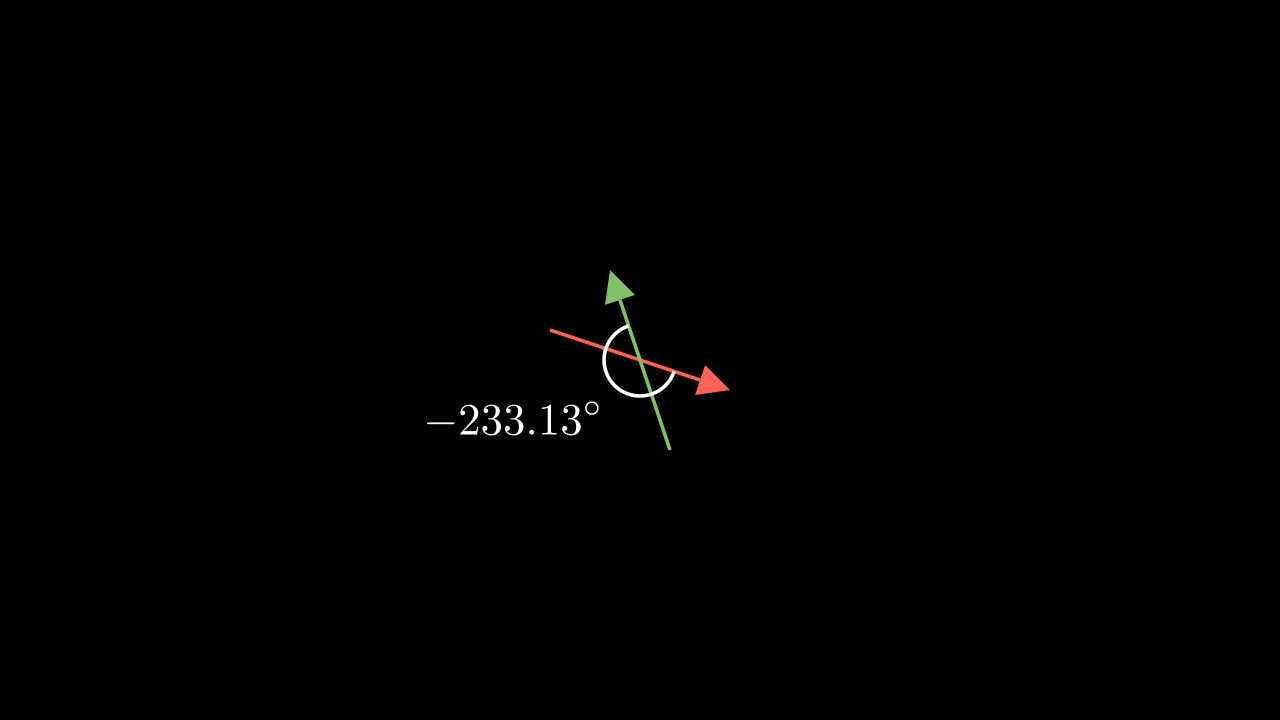

In [25]:
%%manim -qm -v WARNING Ex21

class Ex21(Scene):
    def construct(self):
        # It is not necessary to use "add_tip",
        # I use it so that you can see the 
        # direction of the line, since the
        # direction is important.
        line1 = Line(LEFT+(1/3)*UP, RIGHT+(1/3)*DOWN,color=RED).add_tip()
        line2 = Line(DOWN+(1/3)*RIGHT, UP+(1/3)*LEFT,color=GREEN).add_tip()

        angle = Angle(line1, line2, radius=0.4,other_angle=True)

        value = MathTex("%.2f^\\circ"%(angle.get_value(degrees=True)))\
            .next_to(angle,angle.point_from_proportion(0.5))

        self.add(line1, line2, angle, value)

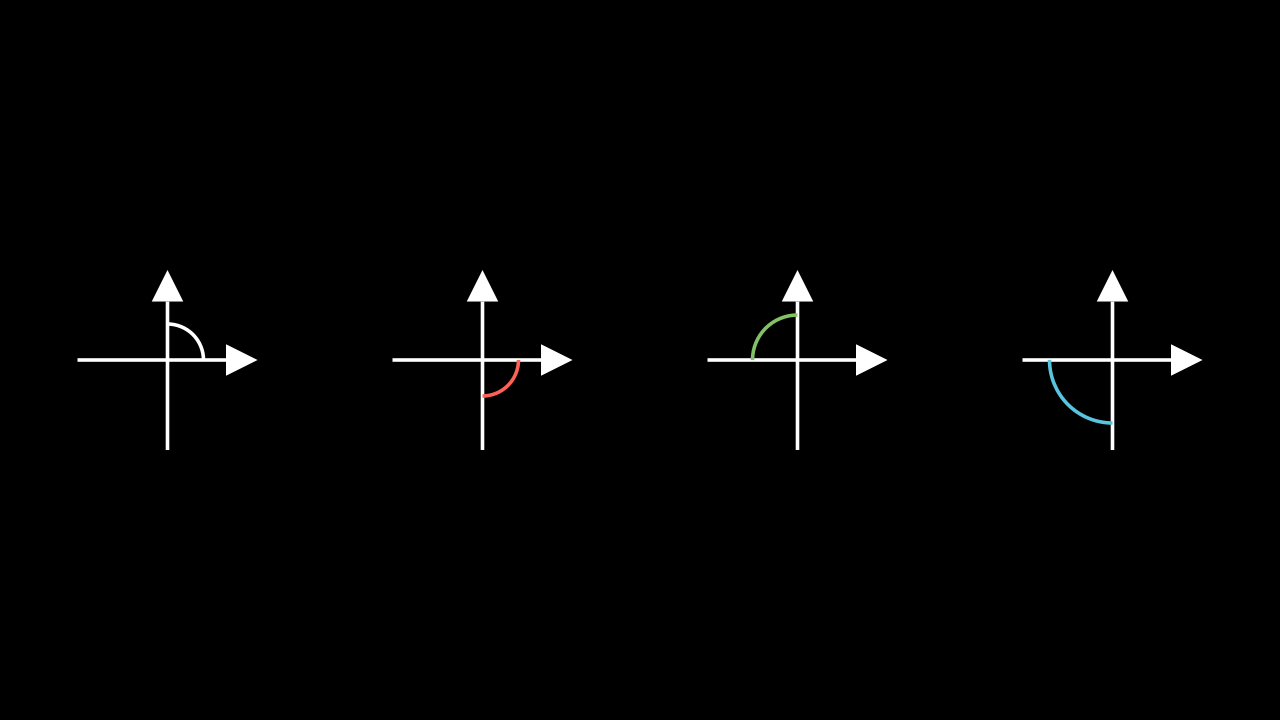

In [26]:
%%manim -qm -v WARNING Ex22

class Ex22(Scene):
    def construct(self):
        # It is not necessary to use "add_tip",
        # I use it so that you can see the 
        # direction of the line, since the
        # direction is important.
        line1 = Line( LEFT, RIGHT ).add_tip()
        line2 = Line( DOWN, UP ).add_tip()
        rightarcangles = [
            Angle(line1, line2),
            Angle(line1, line2, radius=0.4, quadrant=(1,-1), other_angle=True, color=RED),
            Angle(line1, line2, radius=0.5, quadrant=(-1,1), other_angle=True, color=GREEN),
            Angle(line1, line2, radius=0.7, quadrant=(-1,-1), color=BLUE),
        ]
        plots = VGroup()
        for angle in rightarcangles:
            plot=VGroup(line1.copy(),line2.copy(), angle)
            plots.add(plot)
        plots.arrange(RIGHT,buff=1.5)
        self.add(plots)

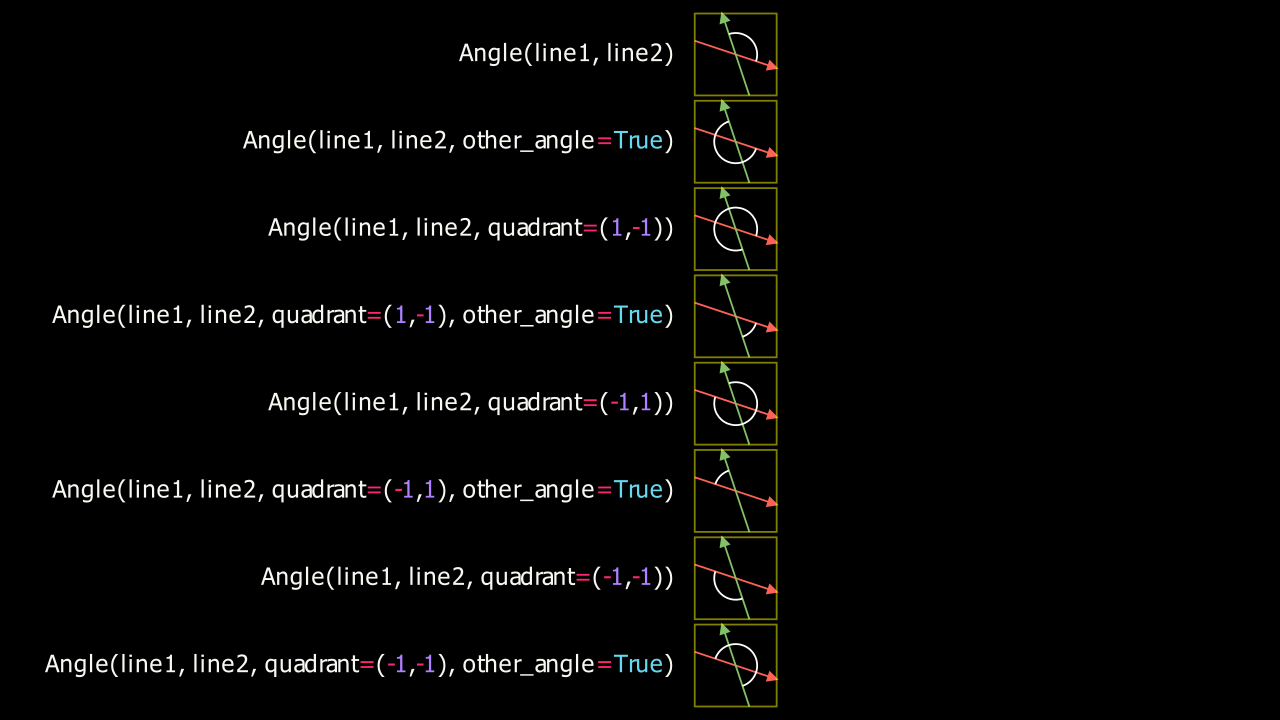

In [27]:
%%manim -qm -v WARNING Ex23

class Ex23(Scene):
    def construct(self):
        # It is not necessary to use "add_tip",
        # I use it so that you can see the 
        # direction of the line, since the
        # direction is important.
        line1 = Arrow( LEFT + (1/3) * UP, RIGHT + (1/3) * DOWN, max_tip_length_to_length_ratio=0.1, color=RED)
        line2 = Arrow( DOWN + (1/3) * RIGHT, UP + (1/3) * LEFT, max_tip_length_to_length_ratio=0.1, color=GREEN)
        angles = [
            Angle(line1, line2),
            Angle(line1, line2, other_angle=True),
            Angle(line1, line2, quadrant=(1,-1)),
            Angle(line1, line2, quadrant=(1,-1), other_angle=True),
            Angle(line1, line2, quadrant=(-1,1)),
            Angle(line1, line2, quadrant=(-1,1), other_angle=True),
            Angle(line1, line2, quadrant=(-1,-1)),
            Angle(line1, line2, quadrant=(-1,-1), other_angle=True),
        ]
        plots = VGroup()
        for angle in angles:
            plot=VGroup(line1.copy(),line2.copy(), angle)
            plots.add(VGroup(plot,SurroundingRectangle(plot, buff=0,stroke_opacity=0.5)))
        plots.arrange(DOWN,buff=0.1).set(height=config.frame_height-0.3)
        plots.set_style(stroke_width=2)
        codes = VGroup(*[
            Code(code=code,language="python",style="monokai",font="Fira Code")[2].scale(0.8)
            for code in [
                "Angle(line1, line2)",
                "Angle(line1, line2, other_angle=True)",
                "Angle(line1, line2, quadrant=(1,-1))",
                "Angle(line1, line2, quadrant=(1,-1), other_angle=True)",
                "Angle(line1, line2, quadrant=(-1,1))",
                "Angle(line1, line2, quadrant=(-1,1), other_angle=True)",
                "Angle(line1, line2, quadrant=(-1,-1))",
                "Angle(line1, line2, quadrant=(-1,-1), other_angle=True)",
            ]
        ])
        for c,p in zip(codes,plots):
            c.next_to(p,LEFT)
        Group(plots,codes).to_edge(LEFT)
        self.add(plots,codes)

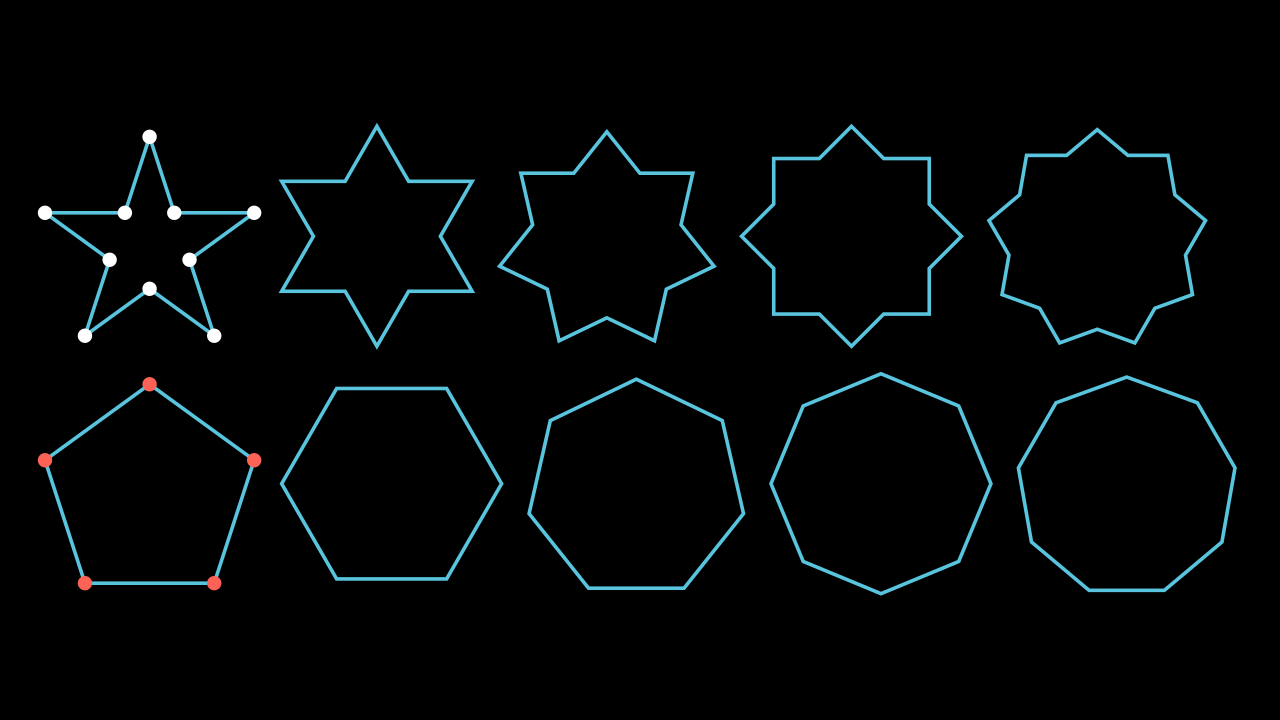

In [28]:
%%manim -qm -v WARNING Ex24

class Ex24(Scene):
    def construct(self):
        stars = VGroup(*[Star(n) for n in range(5,10)])\
            .arrange(RIGHT)
        regular_polygons = VGroup(*[RegularPolygon(n) for n in range(5,10)])\
            .arrange(RIGHT)

        grp = VGroup(stars,regular_polygons)\
            .arrange(DOWN,aligned_edge=LEFT)
        grp.width = config.frame_width-1

        star5 = stars[0]
        star5_vertices = VGroup(*[Dot(p) for p in star5.get_vertices()])

        pentagon = regular_polygons[0]
        pentagon_vertices = VGroup(*[Dot(p,color=RED) for p in pentagon.get_vertices()])


        self.add(grp,star5_vertices,pentagon_vertices)

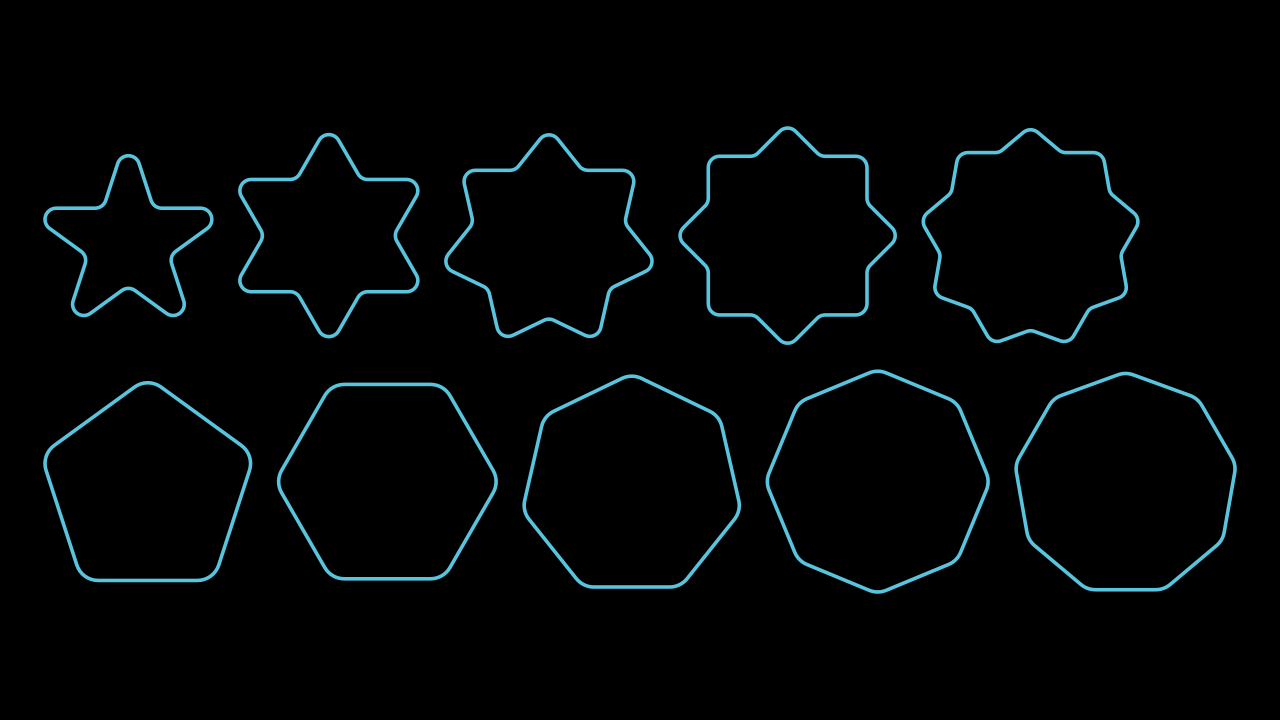

In [29]:
%%manim -qm -v WARNING Ex25

class Ex25(Scene):
    def construct(self):
        stars = VGroup(*[Star(n).round_corners(0.1) for n in range(5,10)])\
            .arrange(RIGHT)
        regular_polygons = VGroup(*[RegularPolygon(n).round_corners(0.2) for n in range(5,10)])\
            .arrange(RIGHT)

        grp = VGroup(stars,regular_polygons)\
            .arrange(DOWN,aligned_edge=LEFT)
        grp.width = config.frame_width-1

        self.add(grp)

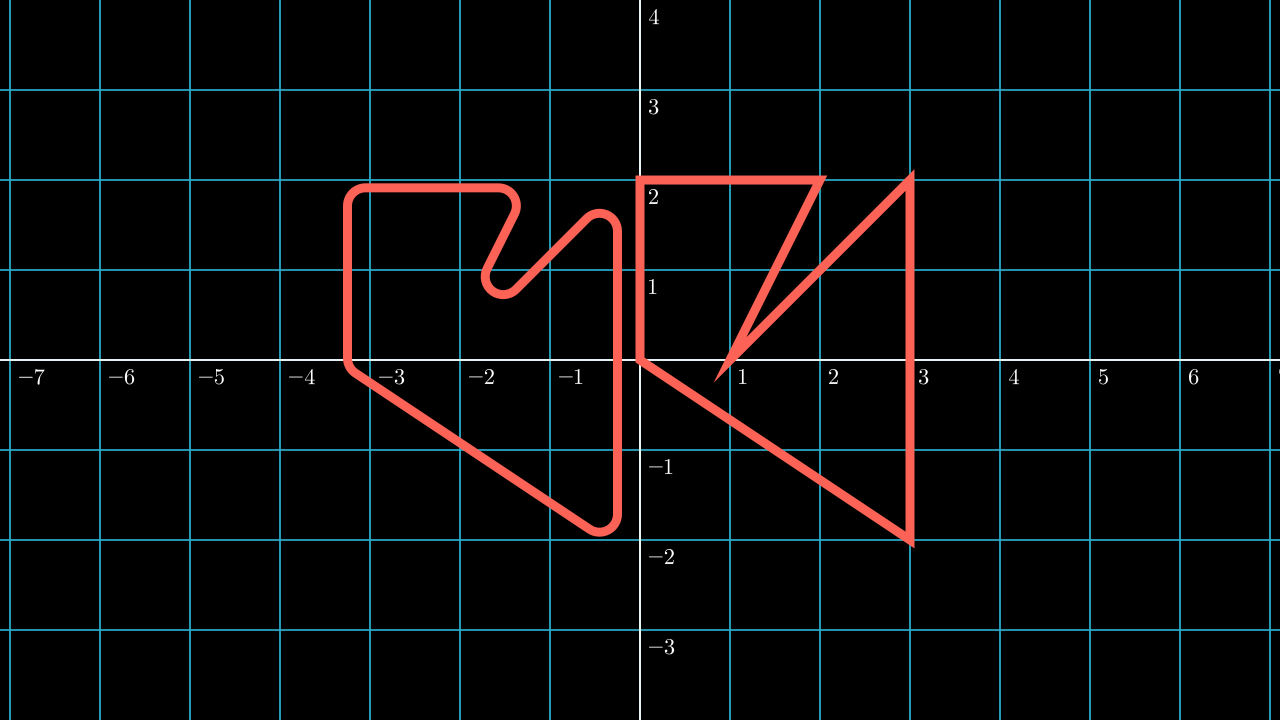

In [30]:
%%manim -qm -v WARNING Ex26

class Ex26(MyScene):
    def construct(self):
        path = Polygon(
                    ORIGIN,
                    UP*2,
                    UP*2+RIGHT*2,
                    UP*2+RIGHT*2+DOWN*2+LEFT,
                    UP*2+RIGHT*2+DOWN*2+LEFT+UR*2,
                    UP*2+RIGHT*2+DOWN*2+LEFT+UR*2+DOWN*4,
                    color=RED,
                    stroke_width=10
                )
        path2 = path.copy()
        path2.round_corners(0.2)
        path2.next_to(path,LEFT)
        self.add(path,path2)

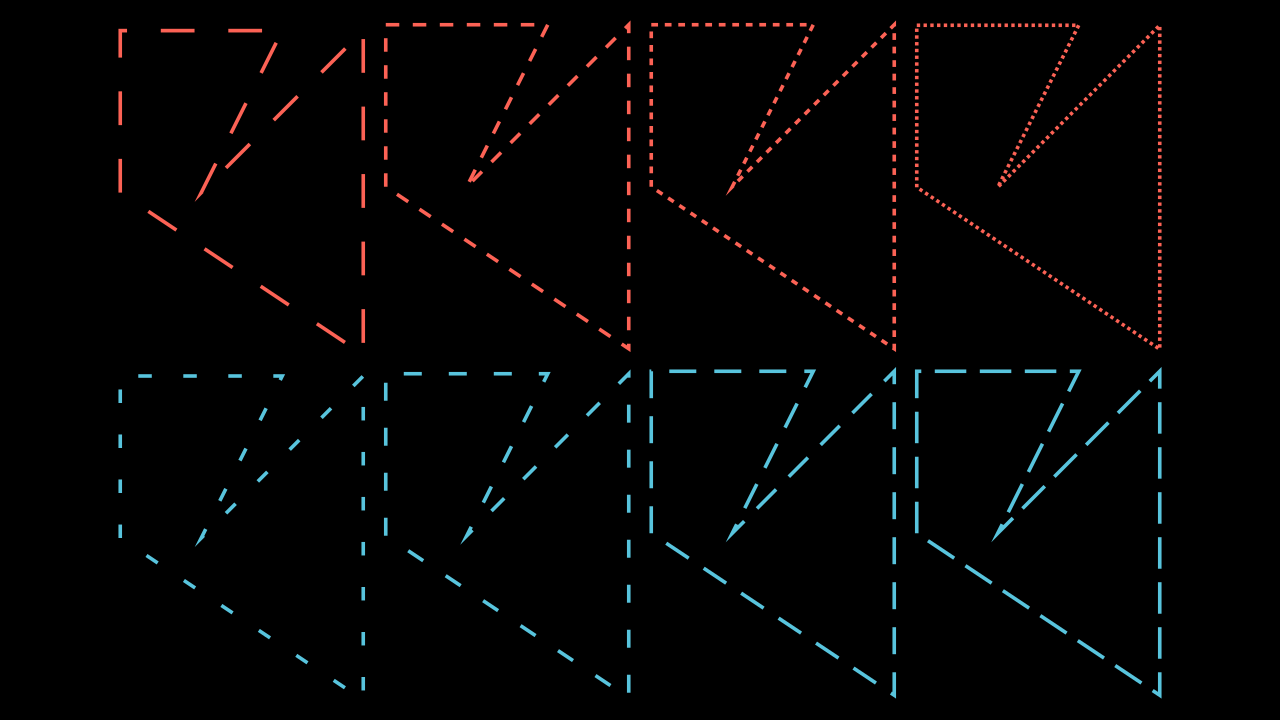

In [31]:
%%manim -qm -v WARNING Ex27

class Ex27(Scene):
    def construct(self):
        path = Polygon(
            ORIGIN,
            UP*2,
            UP*2+RIGHT*2,
            UP*2+RIGHT*2+DOWN*2+LEFT,
            UP*2+RIGHT*2+DOWN*2+LEFT+UR*2,
            UP*2+RIGHT*2+DOWN*2+LEFT+UR*2+DOWN*4,
        ).scale(0.9)

        paths1 = VGroup(*[
            DashedVMobject(path.copy(),num_dashes=nd)
            for nd in [20,50,100,200]
        ]).arrange(RIGHT).set_color(RED)

        paths2 = VGroup(*[
            DashedVMobject(path.copy(),num_dashes=30,dashed_ratio=dr)
            for dr in [0.3,0.4,0.6,0.7]
        ]).arrange(RIGHT).set_color(BLUE)

        grp = Group(paths1,paths2).arrange(DOWN)

        self.add(paths1,paths2)

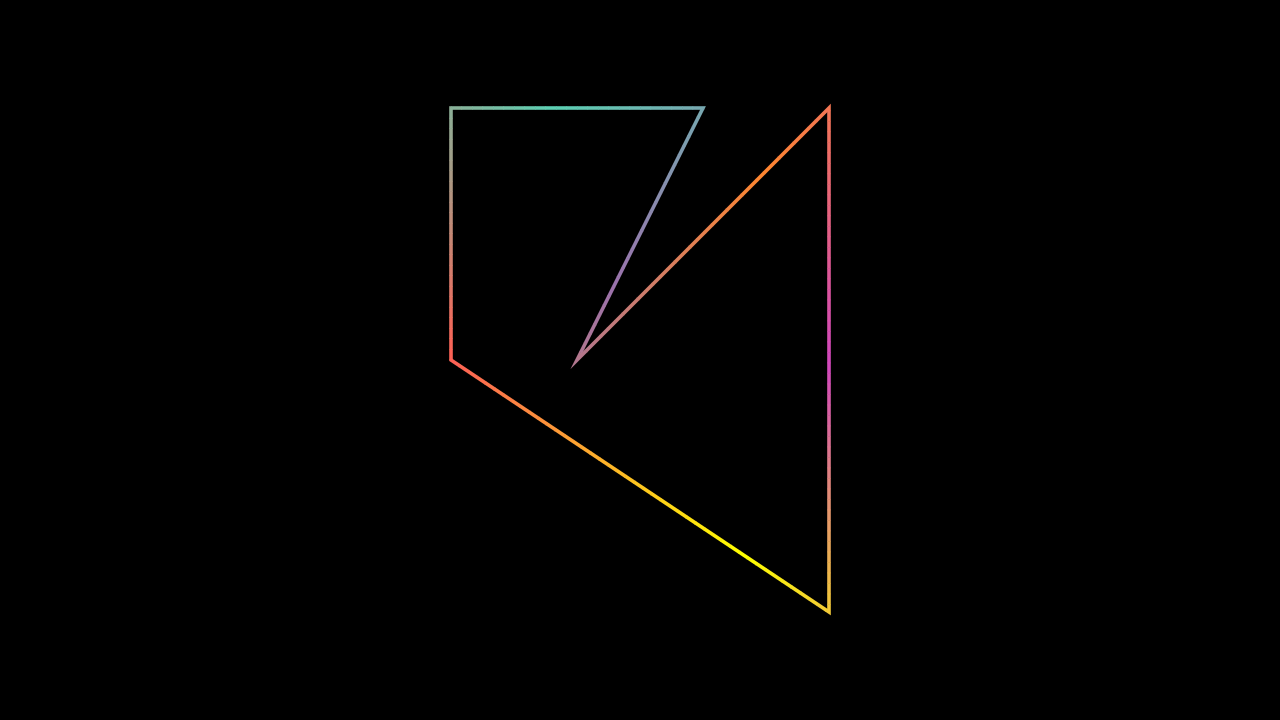

In [32]:
%%manim -qm -v WARNING Ex28

class Ex28(Scene):
    def construct(self):
        path = Polygon(
            ORIGIN,
            UP*2,
            UP*2+RIGHT*2,
            UP*2+RIGHT*2+DOWN*2+LEFT,
            UP*2+RIGHT*2+DOWN*2+LEFT+UR*2,
            UP*2+RIGHT*2+DOWN*2+LEFT+UR*2+DOWN*4,
        ).scale(1.4)
        path.move_to(ORIGIN)

        dashed_path = DashedVMobject(path,num_dashes=200,dashed_ratio=1.05)
        dashed_path.set_color_by_gradient(RED,TEAL,PURPLE,ORANGE,PINK,YELLOW,RED)

        self.add(dashed_path)

In [33]:
%%manim -qm -v WARNING Ex29

class Ex29(MyScene):
    def construct(self):
        diameter = 4
        init_coord = LEFT * 2
        red_arc = ArcBetweenPoints(init_coord, init_coord + RIGHT*diameter, radius=diameter/2, color=RED)
        blue_arc = ArcBetweenPoints(init_coord, init_coord + RIGHT*diameter, radius=-diameter/2, color=BLUE)
        self.add(red_arc)
        self.add(blue_arc)
        self.wait()

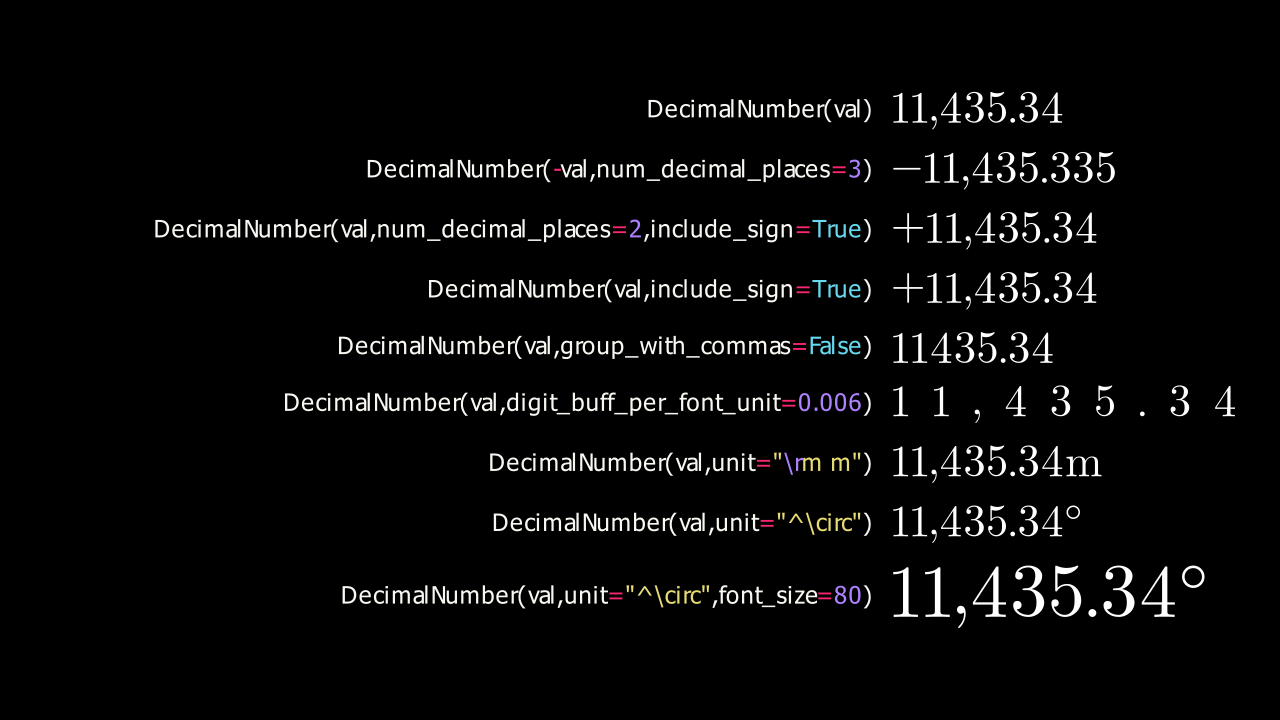

In [34]:
%%manim -qm -v WARNING Ex30

class Ex30(Scene):
    def construct(self):
        val = 11435.3353
        grp = VGroup(
            DecimalNumber(val),
            DecimalNumber(-val,num_decimal_places=3),
            DecimalNumber(val,num_decimal_places=2,include_sign=True),
            DecimalNumber(val,include_sign=True),
            DecimalNumber(val,group_with_commas=False),
            DecimalNumber(val,digit_buff_per_font_unit=0.006),
            DecimalNumber(val,unit="\\rm m"),
            DecimalNumber(val,unit="^\\circ"),
            DecimalNumber(val,unit="^\\circ",font_size=80),
        ).arrange(DOWN,aligned_edge=LEFT).to_edge(RIGHT)

        codes = VGroup(*[
            Code(code=code,language="python",style="monokai",font="Fira Code")[2].scale(0.8)
            for code in [
                "DecimalNumber(val)",
                "DecimalNumber(-val,num_decimal_places=3)",
                "DecimalNumber(val,num_decimal_places=2,include_sign=True)",
                "DecimalNumber(val,include_sign=True)",
                "DecimalNumber(val,group_with_commas=False)",
                "DecimalNumber(val,digit_buff_per_font_unit=0.006)",
                "DecimalNumber(val,unit=\"\\rm m\")",
                "DecimalNumber(val,unit=\"^\\circ\")",
                "DecimalNumber(val,unit=\"^\\circ\",font_size=80)",
            ]
        ])
        for c,p in zip(codes,grp):
            c.next_to(p,LEFT)

        self.add(grp,codes)

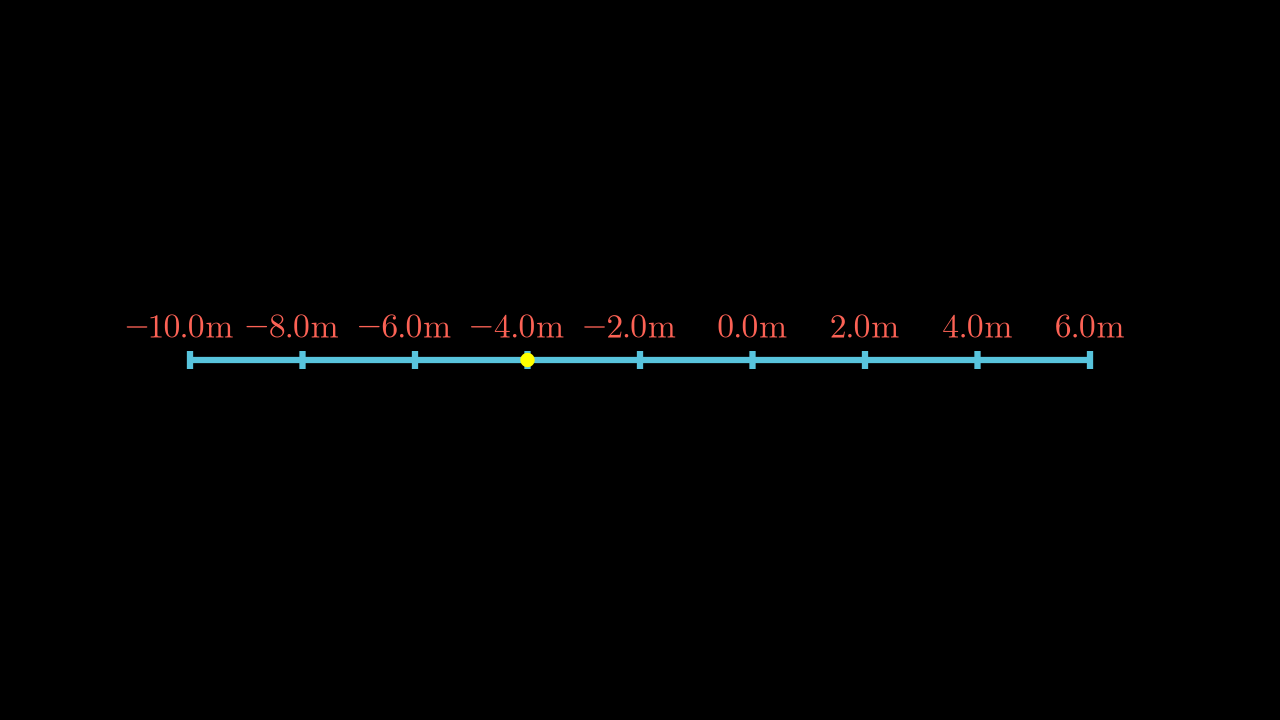

In [35]:
%%manim -qm -v WARNING Ex31

class Ex31(Scene):
    def construct(self):
        START = -10; END   = 6; STEP  = 2
        ln = NumberLine(
            x_range=[START, END, STEP],
            length=10,
            color=BLUE,
            include_numbers=True,
            label_direction=UP,
            decimal_number_config={
                "num_decimal_places": 1,
                "color": RED,
                "unit": "\\rm m"
            },
            stroke_width=7
        )

        dot_at_1 = Dot(ln.n2p(-4),color=YELLOW) # number to point

        self.add(ln,dot_at_1)

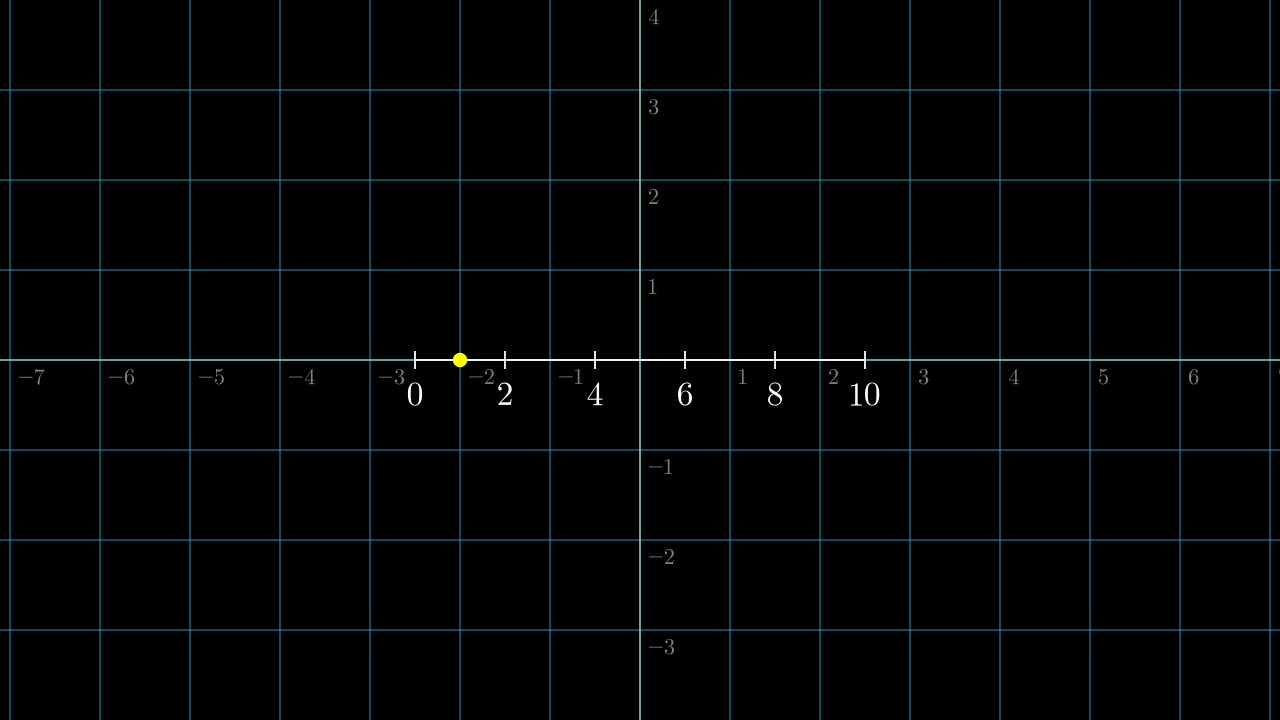

In [36]:
%%manim -qm -v WARNING Ex32

class Ex32(MyScene):
    def construct(self):
        self.np.fade(0.5) # Fade NumberPlane
        START = 0; END   = 10; STEP  = 2
        ln = NumberLine(
            x_range=[START, END, STEP],
            include_numbers=True,
            unit_size=0.5
        )

        dot_at_1 = Dot(ln.n2p(1),color=YELLOW) # number to point

        self.add(ln,dot_at_1)

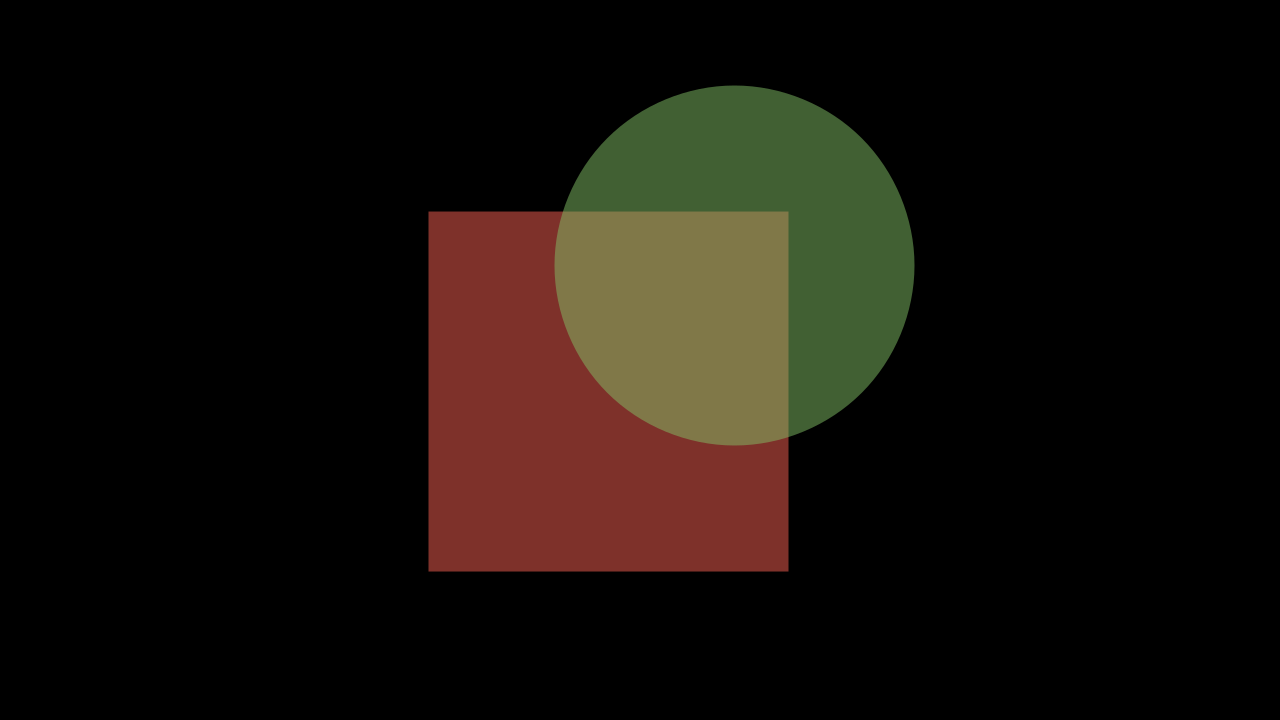

In [37]:
%%manim -qm -v WARNING Ex33

class Ex33(Scene):
    def setup(self):
        kwargs = {"fill_opacity": 1, "stroke_width": 0}
        s = Square(fill_color=RED, **kwargs)
        c = Circle(fill_color=GREEN, **kwargs)\
            .shift(UR*0.7)
        grp = VGroup(s,c).scale(2)
        grp.fade(0.5)

        self.grp = grp
        self.add(grp)

In [41]:
%%manim -qm -v WARNING Ex34

class Ex34(MyScene):
    def construct(self):
        kwargs = {"fill_opacity": 1, "stroke_width": 0}
        s = Square(fill_color=RED, **kwargs)
        c = Circle(fill_color=GREEN, **kwargs)\
            .shift(UR*0.7)
        self.grp = VGroup(s,c).scale(2)
        s,c = self.grp

        union = Union(s,c,fill_opacity=1).set_color(YELLOW)
        self.play(DrawBorderThenFill(union),run_time=4)
        self.wait()

In [42]:
%%manim -qm -v WARNING Ex35

class Ex35(MyScene):
    def construct(self):
        kwargs = {"fill_opacity": 1, "stroke_width": 0}
        s = Square(fill_color=RED, **kwargs)
        c = Circle(fill_color=GREEN, **kwargs)\
            .shift(UR*0.7)
        self.grp = VGroup(s,c).scale(2)
        s,c = self.grp

        inter = Intersection(s,c,fill_opacity=1).set_color(YELLOW)
        self.play(DrawBorderThenFill(inter),run_time=4)
        self.wait()

In [43]:
%%manim -qm -v WARNING Ex36

class Ex36(MyScene):
    def construct(self):
        kwargs = {"fill_opacity": 1, "stroke_width": 0}
        s = Square(fill_color=RED, **kwargs)
        c = Circle(fill_color=GREEN, **kwargs)\
            .shift(UR*0.7)
        self.grp = VGroup(s,c).scale(2)
        s,c = self.grp

        exc = Exclusion(s,c,fill_opacity=1).set_color(YELLOW)
        self.play(DrawBorderThenFill(exc),run_time=4)
        self.wait()